In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import combinations
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.stats import chi2_contingency
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [ ]:
file_path = "/content/netflix-titles.csv"
df = pd.read_csv(file_path)
df.head()

Timestamp  age             Gender  \
0  2023/06/04 1:28:19 PM GMT+5:30   23             Female   
1  2023/06/04 2:30:44 PM GMT+5:30   23             Female   
2  2023/06/04 5:04:56 PM GMT+5:30   24  Prefer not to say   
3  2023/06/04 5:13:00 PM GMT+5:30   24             Female   
4  2023/06/04 5:28:06 PM GMT+5:30   22             Female   

       Purchase_Frequency                                Purchase_Categories  \
0       Few times a month                           Beauty and Personal Care   
1            Once a month                               Clothing and Fashion   
2       Few times a month    Groceries and Gourmet Food;Clothing and Fashion   
3            Once a month  Beauty and Personal Care;Clothing and Fashion;...   
4  Less than once a month      Beauty and Personal Care;Clothing and Fashion   

  Personalized_Recommendation_Frequency Browsing_Frequency  \
0                                   Yes   Few times a week   
1                                   Yes  Few times a month   
2                                    No  Few times a month   
3                             Sometimes  Few times a month   
4                                   Yes  Few times a month   

  Product_Search_Method Search_Result_Exploration  \
0               Keyword            Multiple pages   
1               Keyword            Multiple pages   
2               Keyword            Multiple pages   
3               Keyword                First page   
4                Filter            Multiple pages   

   Customer_Reviews_Importance  ... Saveforlater_Frequency Review_Left  \
0                            1  ...              Sometimes         Yes   
1                            1  ...                 Rarely          No   
2                            2  ...                 Rarely          No   
3                            5  ...              Sometimes         Yes   
4                            1  ...                 Rarely          No   

  Review_Reliability Review_Helpfulness  \
0       Occasionally                Yes   
1            Heavily                Yes   
2       Occasionally                 No   
3            Heavily                Yes   
4            Heavily                Yes   

  Personalized_Recommendation_Frequency  Recommendation_Helpfulness  \
0                                      2                        Yes   
1                                      2                  Sometimes   
2                                      4                         No   
3                                      3                  Sometimes   
4                                      4                        Yes   

  Rating_Accuracy   Shopping_Satisfaction    Service_Appreciation  \
0                1                      1      Competitive prices   
1                3                      2  Wide product selection   
2                3                      3      Competitive prices   
3                3                      4      Competitive prices   
4                2                      2      Competitive prices   

              Improvement_Areas  
0      Reducing packaging waste  
1      Reducing packaging waste  
2  Product quality and accuracy  
3  Product quality and accuracy  
4  Product quality and accuracy  

[5 rows x 23 columns]

### EDA - Exploratory Data Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602 entries, 0 to 601
Data columns (total 23 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Timestamp                               602 non-null    object
 1   age                                     602 non-null    int64 
 2   Gender                                  602 non-null    object
 3   Purchase_Frequency                      602 non-null    object
 4   Purchase_Categories                     602 non-null    object
 5   Personalized_Recommendation_Frequency   602 non-null    object
 6   Browsing_Frequency                      602 non-null    object
 7   Product_Search_Method                   600 non-null    object
 8   Search_Result_Exploration               602 non-null    object
 9   Customer_Reviews_Importance             602 non-null    int64 
 10  Add_to_Cart_Browsing                    602 non-null    object
 11  Cart_C

#### Comments
I only have two data types, **object** and **int64**, leaving the Timestamp as a note

In [6]:
df.isna().sum()

Timestamp                                 0
age                                       0
Gender                                    0
Purchase_Frequency                        0
Purchase_Categories                       0
Personalized_Recommendation_Frequency     0
Browsing_Frequency                        0
Product_Search_Method                     2
Search_Result_Exploration                 0
Customer_Reviews_Importance               0
Add_to_Cart_Browsing                      0
Cart_Completion_Frequency                 0
Cart_Abandonment_Factors                  0
Saveforlater_Frequency                    0
Review_Left                               0
Review_Reliability                        0
Review_Helpfulness                        0
Personalized_Recommendation_Frequency     0
Recommendation_Helpfulness                0
Rating_Accuracy                           0
Shopping_Satisfaction                     0
Service_Appreciation                      0
Improvement_Areas                         0
dtype: int64

#### Comments
Only **Product_Search_Method** has null values and it's not an expressive volume

In [7]:
# Numerical columns
numerical = df.select_dtypes(include=['int64'])

# Categorical columns
categorical = df.select_dtypes(include=['object'])

In [8]:
numerical

age  Customer_Reviews_Importance  Personalized_Recommendation_Frequency   \
0     23                            1                                       2   
1     23                            1                                       2   
2     24                            2                                       4   
3     24                            5                                       3   
4     22                            1                                       4   
..   ...                          ...                                     ...   
597   23                            4                                       3   
598   23                            3                                       3   
599   23                            3                                       3   
600   23                            1                                       2   
601   23                            3                                       3   

     Rating_Accuracy   Shopping_Satisfaction  
0                   1                      1  
1                   3                      2  
2                   3                      3  
3                   3                      4  
4                   2                      2  
..                ...                    ...  
597                 3                      4  
598                 3                      3  
599                 2                      3  
600                 2                      2  
601                 3                      3  

[602 rows x 5 columns]

In [9]:
numerical.describe()

age  Customer_Reviews_Importance  \
count  602.000000                   602.000000   
mean    30.790698                     2.480066   
std     10.193276                     1.185226   
min      3.000000                     1.000000   
25%     23.000000                     1.000000   
50%     26.000000                     3.000000   
75%     36.000000                     3.000000   
max     67.000000                     5.000000   

       Personalized_Recommendation_Frequency   Rating_Accuracy   \
count                              602.000000        602.000000   
mean                                 2.699336          2.672757   
std                                  1.042028          0.899744   
min                                  1.000000          1.000000   
25%                                  2.000000          2.000000   
50%                                  3.000000          3.000000   
75%                                  3.000000          3.000000   
max                                  5.000000          5.000000   

       Shopping_Satisfaction  
count             602.000000  
mean                2.463455  
std                 1.012152  
min                 1.000000  
25%                 2.000000  
50%                 2.000000  
75%                 3.000000  
max                 5.000000

#### Comments

* age

Here we can see that the mean age of the costumers is around **31 years** with a deviation of **10 years** and the interquartile range (IQR) lie **between 23 and 36** years, but analyzing the min (**3 years?**) and the quarters distribution (**relatively wide**), has some **possible outliers**

* other

The remaining numerical features have **means around the middle** of their respective scales (**between 2 and 3**), indicating a **central tendency** towards moderate values and regarding the quartile ranges (**concentraded around the middle**) and the standard deviations are **relatively low** (Rating_Accuracy and Shopping_Satisfaction) suggesting that the data points are **closely clustered around the mean**.

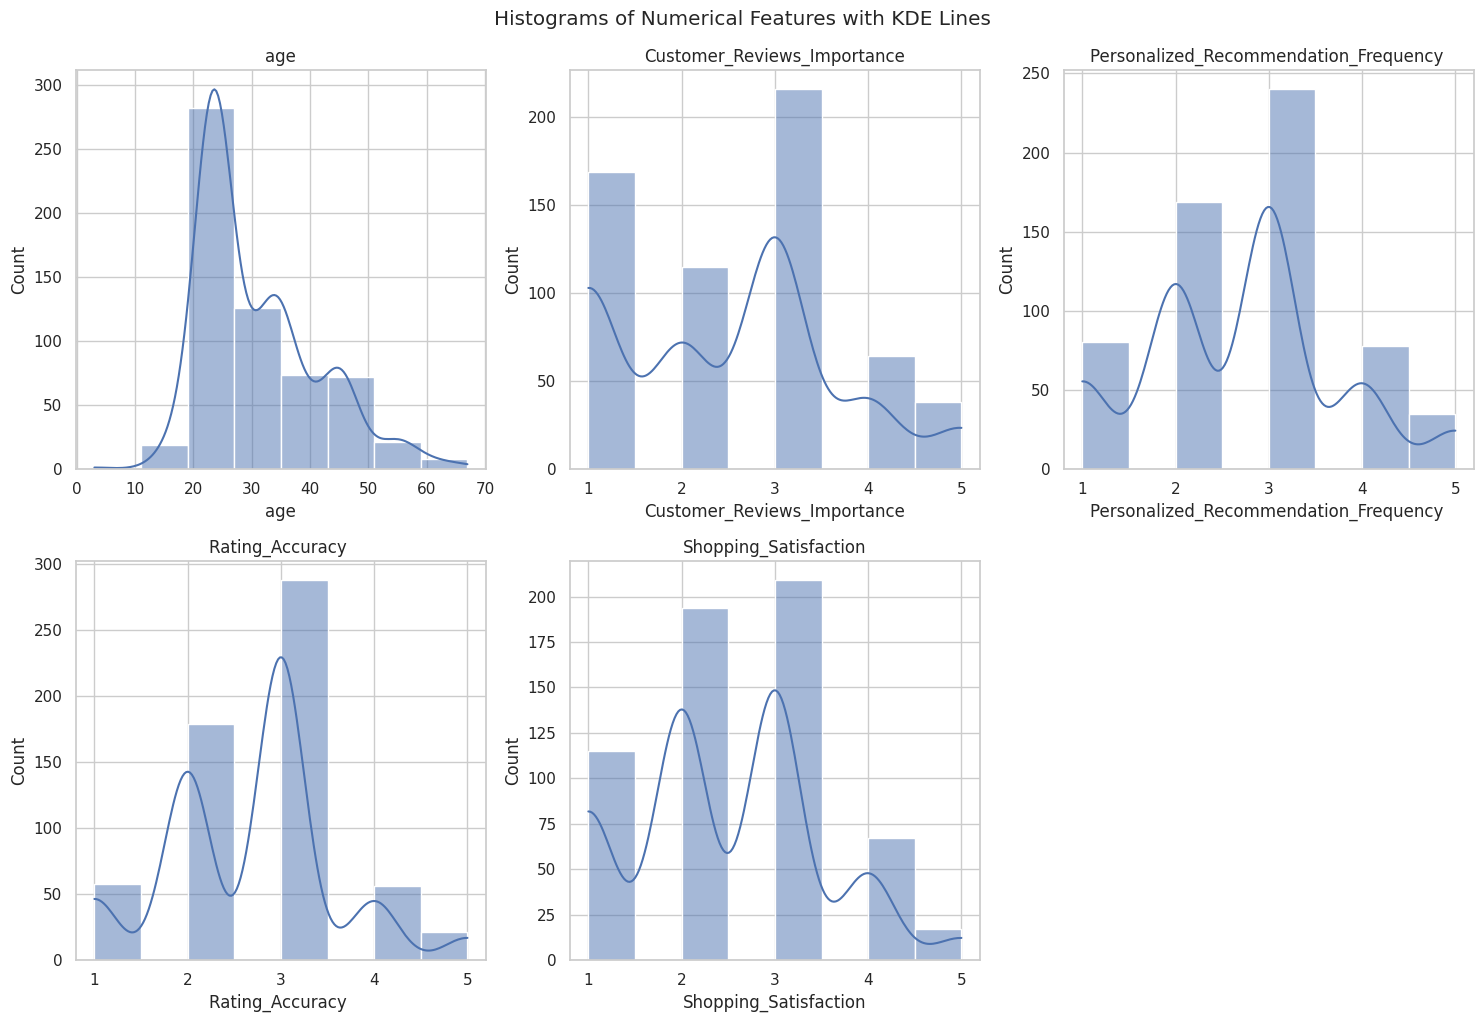

In [10]:
# Histograms with KDE lines
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical.columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(numerical[column], kde=True, bins=8)
    plt.title(f'{column}')
plt.tight_layout()
plt.suptitle('Histograms of Numerical Features with KDE Lines', y=1.02)
plt.show()

#### Comments

**age** has a **positive skew**, it means that there are a few **high-value outliers** (besides that 3 on the left) on the right side

**Customer_Review_Importance** has a significant concentration in number 1 and 3 turning the distribution not symmetric and reflecting the bimodal, thus **causing the mean to drop** in comparison to the rest where and. This suggests that there are **two main groups of customers**: one that **does not find customer reviews important** (rating 1) and another that finds them **moderately important** (rating 3)

**Personalized_Recommendation_Frequency** shows a distribution with a clear peak at rating 3, suggesting that most customers experience a **moderate frequency of personalized recommendations** and there is a slight left skew (**negative skew**), with a tail extending towards the lower ratings

**Rating_Accuracy** shows a peak at rating 3, indicating that most customers rate the accuracy of ratings as **neutral or moderate** and there is a **slight left skew** (negative skew)

**Shopping_Satisfaction** appears to have a peak at rating 3, with a significant number of responses also at rating 2 indicating that a number of customers are **less satisfied** and a pronounced concentration in the 3 first quarters

- Overall: a portion of the customers are around mid-20s and rate them lower than the median

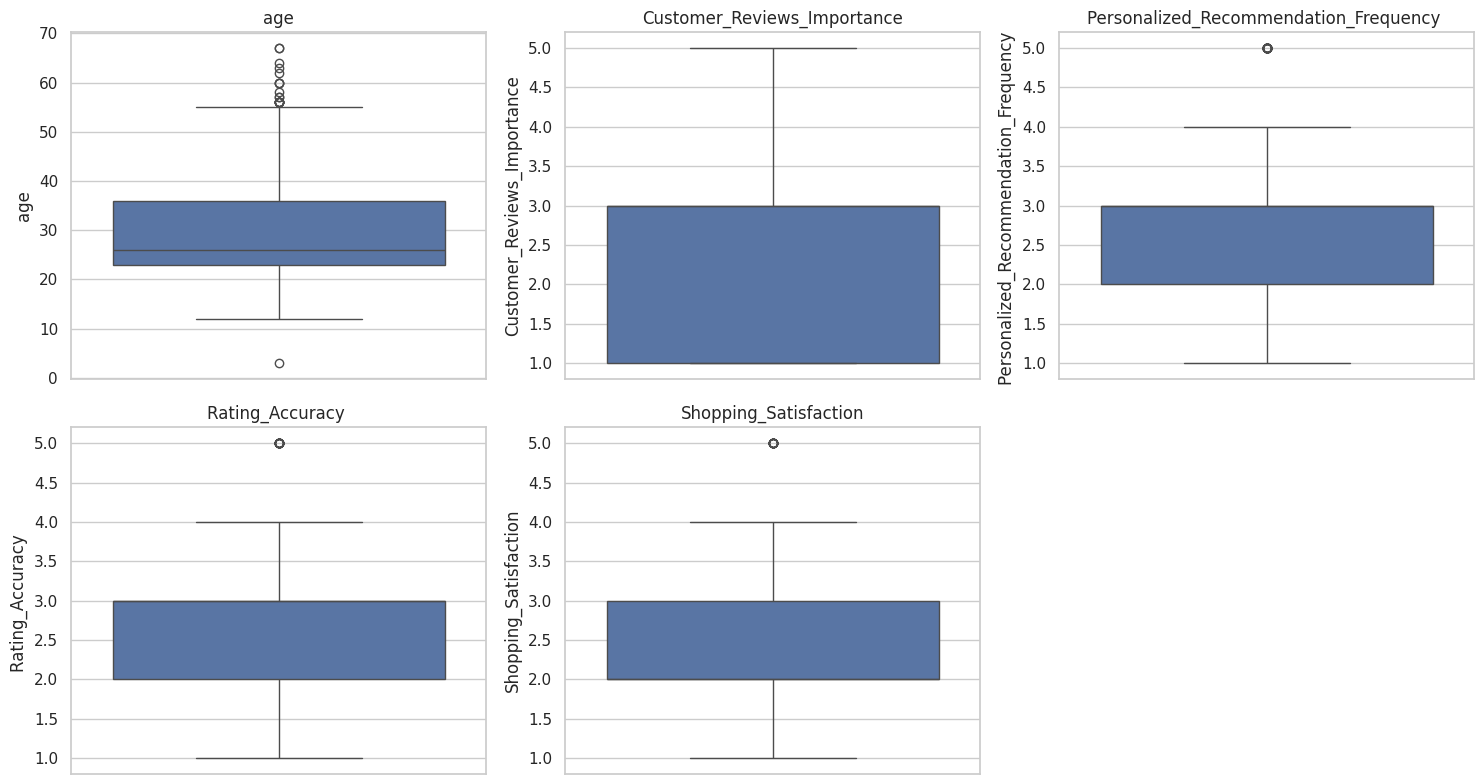

In [11]:
# Box Plot
plt.figure(figsize=(15, 8))
for i, column in enumerate(numerical.columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=numerical[column])
    plt.title(f'{column}')
plt.tight_layout()
plt.show()

#### Comments

**age** has this line indicating the median age (mid-20s), and there are **several outliers** on both the lower and upper ends, with more pronounced outliers on the upper end, indicating some customers are **significantly older than the average**

**Customer_Reviews_Importance** box is compact, indicating that the middle 50% of ratings are close together and suggesting that some customers rate the importance of customer reviews as **significantly lower than the rest**

**Personalized_Recommendation_Frequency**, **Rating_Accuracy** and **Shopping_Satisfaction** box appears to be very short, showing little variation in the middle 50% and has a few outliers on the upper end

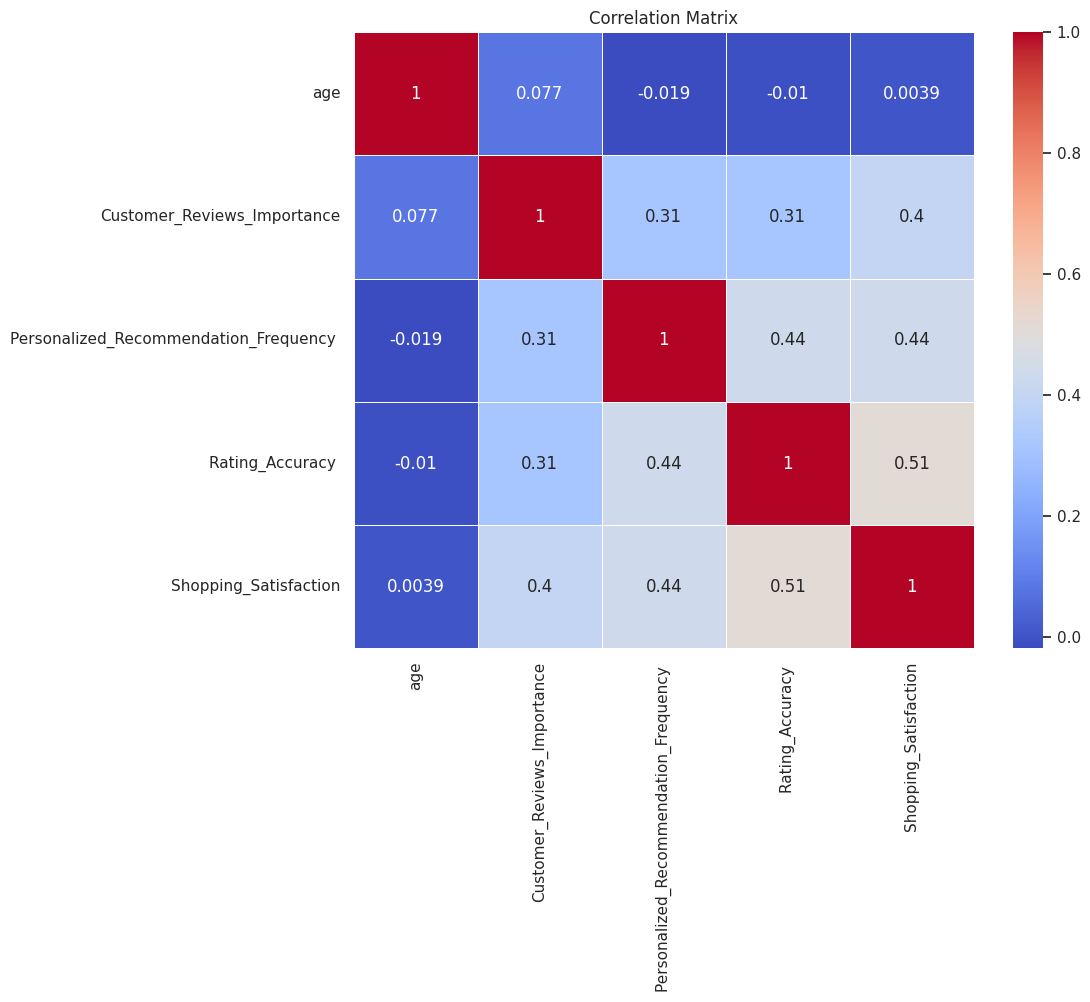

In [12]:
# Correlation Matrix
correlation_matrix = numerical.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

#### Comments

Customer age has **very little influence** on the other variables, suggesting that **age might not be a critical factor** in how customers perceive or interact with various aspects of the shopping experience

Higher importance of reviews, more frequent recommendations, and higher rating accuracy are associated with each other and with higher shopping satisfaction. These relationships suggest that **engagement and reliability are key to customer satisfaction**

The strongest correlation is with Shopping Satisfaction and Rating Accuracy, which could imply that **ensuring accurate and trustworthy product ratings should be a priority for improving customer satisfaction**



In [13]:
categorical

Timestamp             Gender  \
0    2023/06/04 1:28:19 PM GMT+5:30             Female   
1    2023/06/04 2:30:44 PM GMT+5:30             Female   
2    2023/06/04 5:04:56 PM GMT+5:30  Prefer not to say   
3    2023/06/04 5:13:00 PM GMT+5:30             Female   
4    2023/06/04 5:28:06 PM GMT+5:30             Female   
..                              ...                ...   
597  2023/06/12 4:02:02 PM GMT+5:30             Female   
598  2023/06/12 4:02:53 PM GMT+5:30             Female   
599  2023/06/12 4:03:59 PM GMT+5:30             Female   
600  2023/06/12 9:57:20 PM GMT+5:30             Female   
601  2023/06/16 9:16:05 AM GMT+5:30             Female   

         Purchase_Frequency  \
0         Few times a month   
1              Once a month   
2         Few times a month   
3              Once a month   
4    Less than once a month   
..                      ...   
597             Once a week   
598             Once a week   
599            Once a month   
600       Few times a month   
601             Once a week   

                                   Purchase_Categories  \
0                             Beauty and Personal Care   
1                                 Clothing and Fashion   
2      Groceries and Gourmet Food;Clothing and Fashion   
3    Beauty and Personal Care;Clothing and Fashion;...   
4        Beauty and Personal Care;Clothing and Fashion   
..                                                 ...   
597                           Beauty and Personal Care   
598                               Clothing and Fashion   
599                           Beauty and Personal Care   
600  Beauty and Personal Care;Clothing and Fashion;...   
601                               Clothing and Fashion   

    Personalized_Recommendation_Frequency    Browsing_Frequency  \
0                                     Yes      Few times a week   
1                                     Yes     Few times a month   
2                                      No     Few times a month   
3                               Sometimes     Few times a month   
4                                     Yes     Few times a month   
..                                    ...                   ...   
597                             Sometimes      Few times a week   
598                             Sometimes      Few times a week   
599                             Sometimes      Few times a week   
600                                   Yes     Few times a month   
601                             Sometimes  Multiple times a day   

    Product_Search_Method Search_Result_Exploration Add_to_Cart_Browsing  \
0                 Keyword            Multiple pages                  Yes   
1                 Keyword            Multiple pages                  Yes   
2                 Keyword            Multiple pages                  Yes   
3                 Keyword                First page                Maybe   
4                  Filter            Multiple pages                  Yes   
..                    ...                       ...                  ...   
597            categories            Multiple pages                Maybe   
598                Filter            Multiple pages                Maybe   
599            categories            Multiple pages                Maybe   
600               Keyword            Multiple pages                  Yes   
601               Keyword            Multiple pages                Maybe   

    Cart_Completion_Frequency        Cart_Abandonment_Factors  \
0                   Sometimes  Found a better price elsewhere   
1                       Often             High shipping costs   
2                   Sometimes  Found a better price elsewhere   
3                   Sometimes  Found a better price elsewhere   
4                   Sometimes             High shipping costs   
..                        ...                             ...   
597                 Sometimes  Found a better price elsewhere   
598                 S

In [14]:
for column in categorical.columns:
    print(column)

Timestamp
Gender
Purchase_Frequency
Purchase_Categories
Personalized_Recommendation_Frequency
Browsing_Frequency
Product_Search_Method
Search_Result_Exploration
Add_to_Cart_Browsing
Cart_Completion_Frequency
Cart_Abandonment_Factors
Saveforlater_Frequency
Review_Left
Review_Reliability
Review_Helpfulness
Recommendation_Helpfulness
Service_Appreciation
Improvement_Areas


<ipython-input-15-1590e16edc4c>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  categorical['Timestamp'] = pd.to_datetime(categorical['Timestamp'])


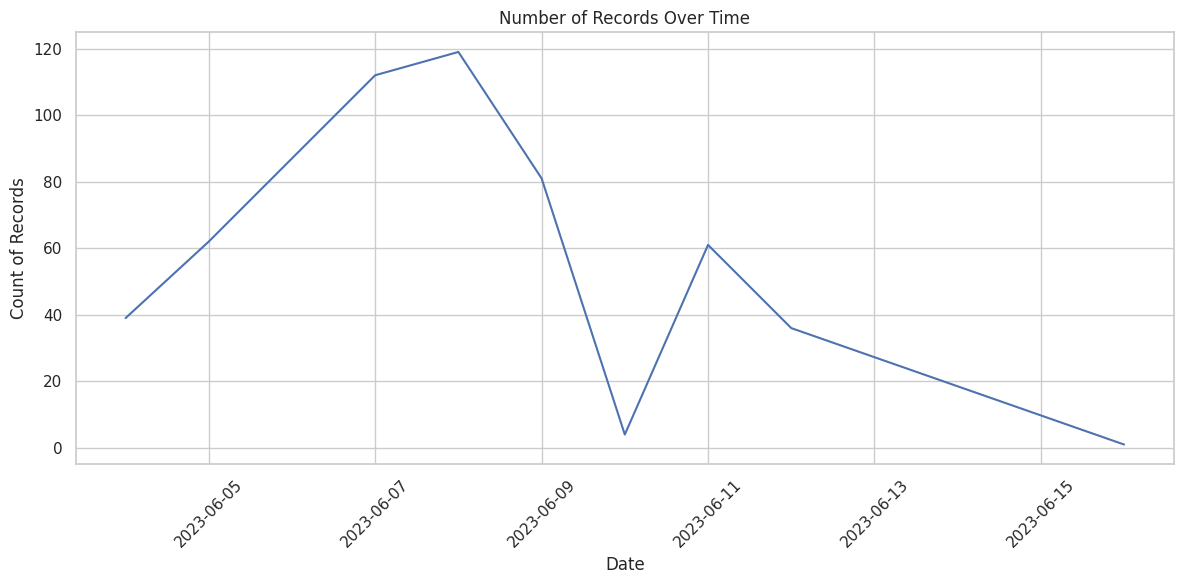

In [15]:
# Convert Timestamp to datetime
categorical['Timestamp'] = pd.to_datetime(categorical['Timestamp'])
time_series_data = categorical['Timestamp'].dt.date.value_counts().sort_index()

sns.set(style="whitegrid")

# Line Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=time_series_data.index, y=time_series_data.values)
plt.title('Number of Records Over Time')
plt.xlabel('Date')
plt.ylabel('Count of Records')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [16]:
print("Starts: ", categorical['Timestamp'].min())
print("Ends: ", categorical['Timestamp'].max())

Starts:  2023-06-04 13:28:19-05:30
Ends:  2023-06-16 09:16:05-05:30


#### Comments

The records starts in 2023/06/04 and goes until 2023/06/16 with a top of records in 06/08/2023 (**Corpus Christi holliday**), has a down in 06/10/2023 and the weekends are 06/03 and 06/04 and 06/10 and 06/11 but we don't have conclusions about that

In [17]:
# Drop Timestamp
categorical = categorical.drop(columns=['Timestamp'])

In [18]:
def visualize_categorical(series, title=None):
    """
    Visualize the distribution of a categorical feature.

    Params:
    - series (pd.Series): The categorical data to visualize.
    - title (str): Title for the plot. If None, defaults to 'Count of {series.name}'.
    """
    # Value counts
    print(series.value_counts())

    # Set up the seaborn style
    sns.set(style="whitegrid")

    # Count Plot
    plt.figure(figsize=(10, 8))
    sns.countplot(y=series, order=series.value_counts().index)
    plt.title(title if title else f'Count of {series.name}')
    plt.xlabel('Count')
    plt.ylabel(series.name)
    plt.show()

Gender
Female               352
Male                 142
Prefer not to say     89
Others                19
Name: count, dtype: int64


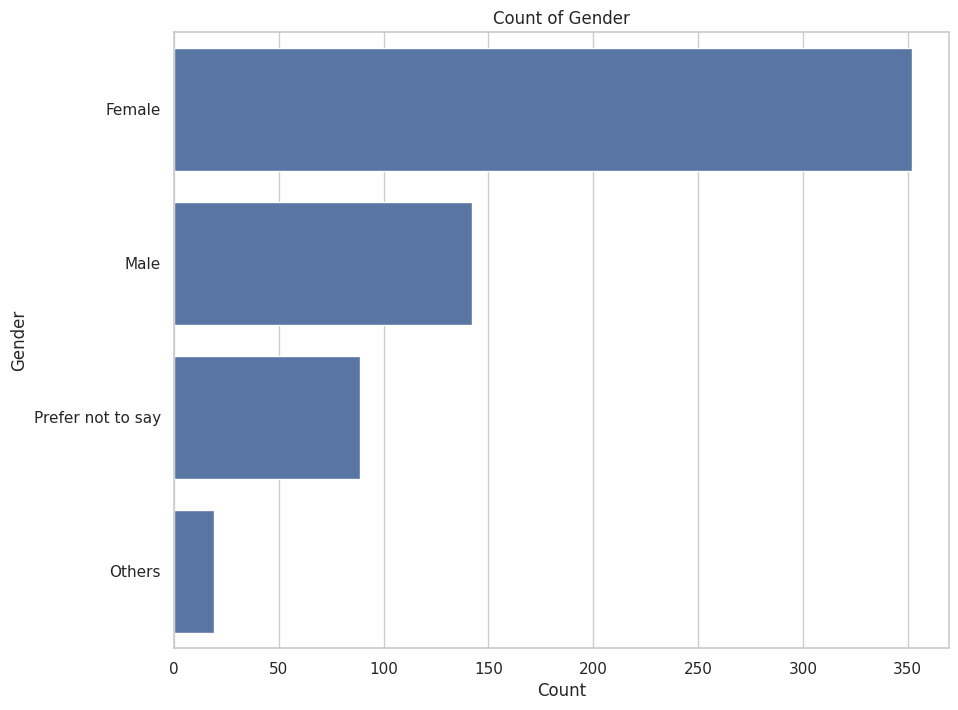

In [19]:
visualize_categorical(categorical['Gender'])

#### Comments

A **significantly higher number of females** are represented in this dataset compared to males and other gender categories

Purchase_Frequency
Few times a month         203
Less than once a month    124
Once a week               112
Once a month              107
Multiple times a week      56
Name: count, dtype: int64


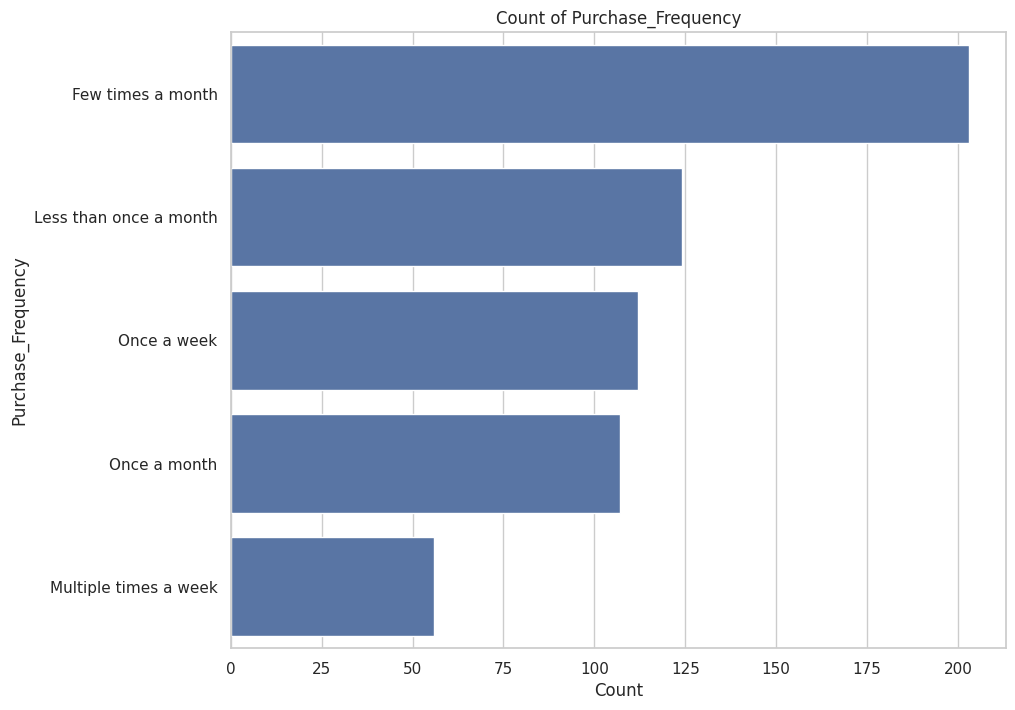

In [20]:
visualize_categorical(categorical['Purchase_Frequency'])

#### Comments

The **majority** of customers **make purchases a few times a month**, followed by those purchasing less than once a month. This suggests that most customers are **occasional shoppers** rather than frequent ones

Purchase_Categories
Beauty and Personal Care                                                                            106
Clothing and Fashion                                                                                106
others                                                                                               48
Beauty and Personal Care;Clothing and Fashion                                                        46
Beauty and Personal Care;Clothing and Fashion;Home and Kitchen                                       42
Groceries and Gourmet Food;Beauty and Personal Care;Clothing and Fashion;Home and Kitchen;others     32
Clothing and Fashion;Home and Kitchen                                                                27
Home and Kitchen                                                                                     24
Beauty and Personal Care;Home and Kitchen                                                            21
Clothing and Fashion;Home and Kitchen;others

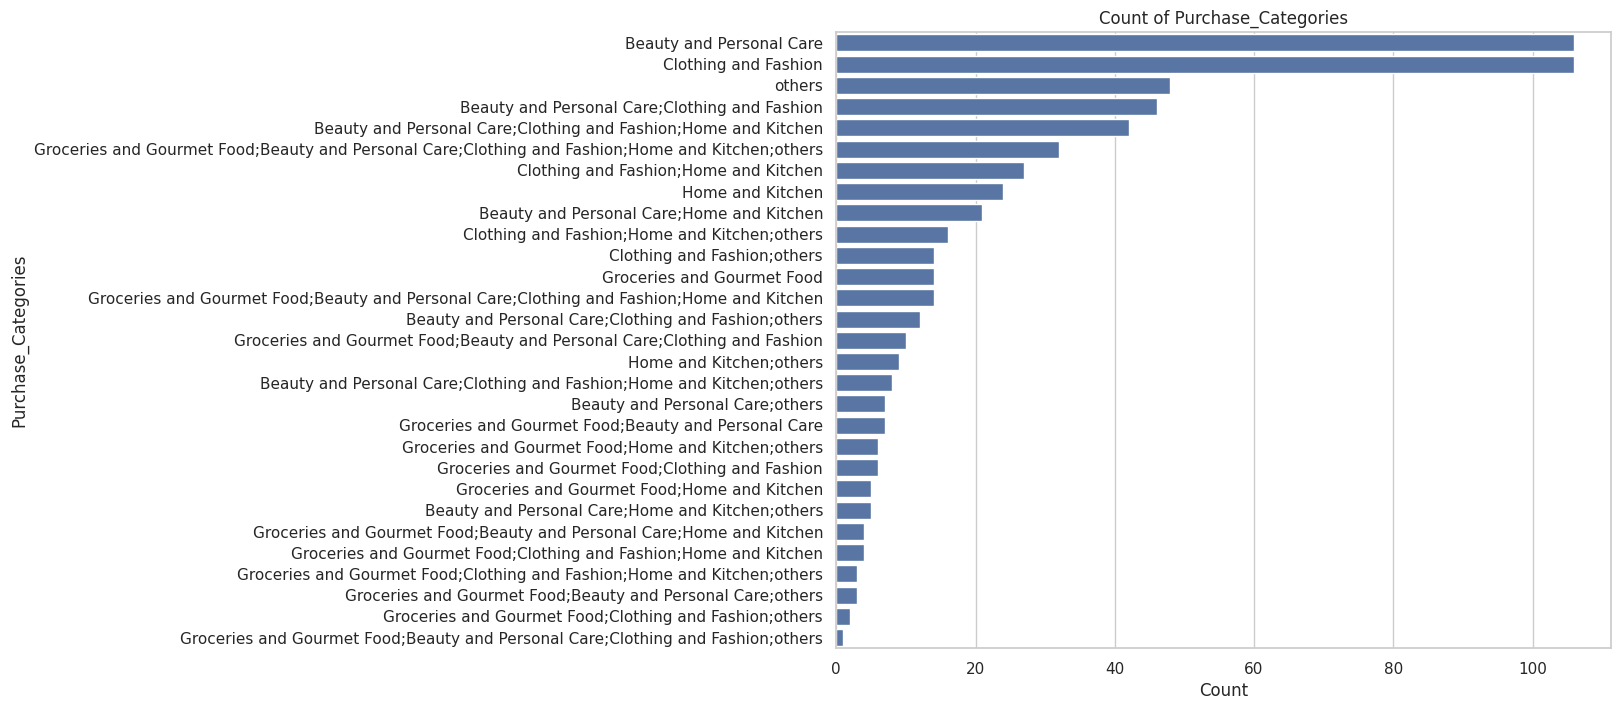

In [21]:
visualize_categorical(categorical['Purchase_Categories'])

#### Comments

The most common product categories purchased are **Beauty and Personal Care** and **Clothing and Fashion**. Customers also frequently buy from 'Home and Kitchen' and 'Groceries and Gourmet Food'

Personalized_Recommendation_Frequency
No           251
Sometimes    229
Yes          122
Name: count, dtype: int64


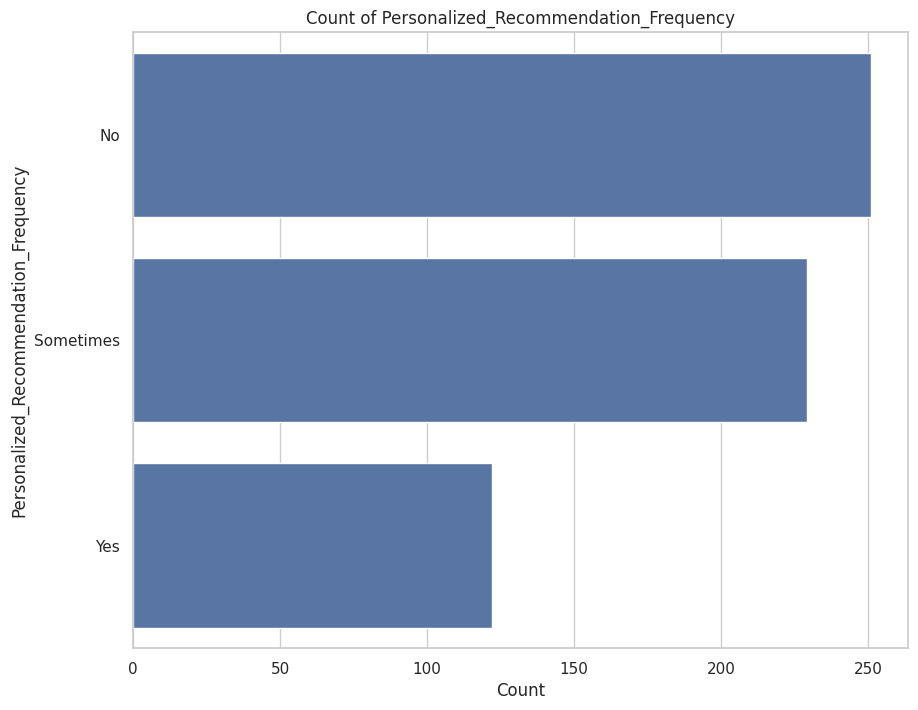

In [22]:
visualize_categorical(categorical['Personalized_Recommendation_Frequency'])

#### Comments

Many customers have made purchases based on Amazon's personalized recommendations, with 'No' being the most common response, suggesting a **significant number of customers may not be influenced by** or aware of personalized recommendations

Browsing_Frequency
Few times a week        249
Few times a month       199
Rarely                   77
Multiple times a day     77
Name: count, dtype: int64


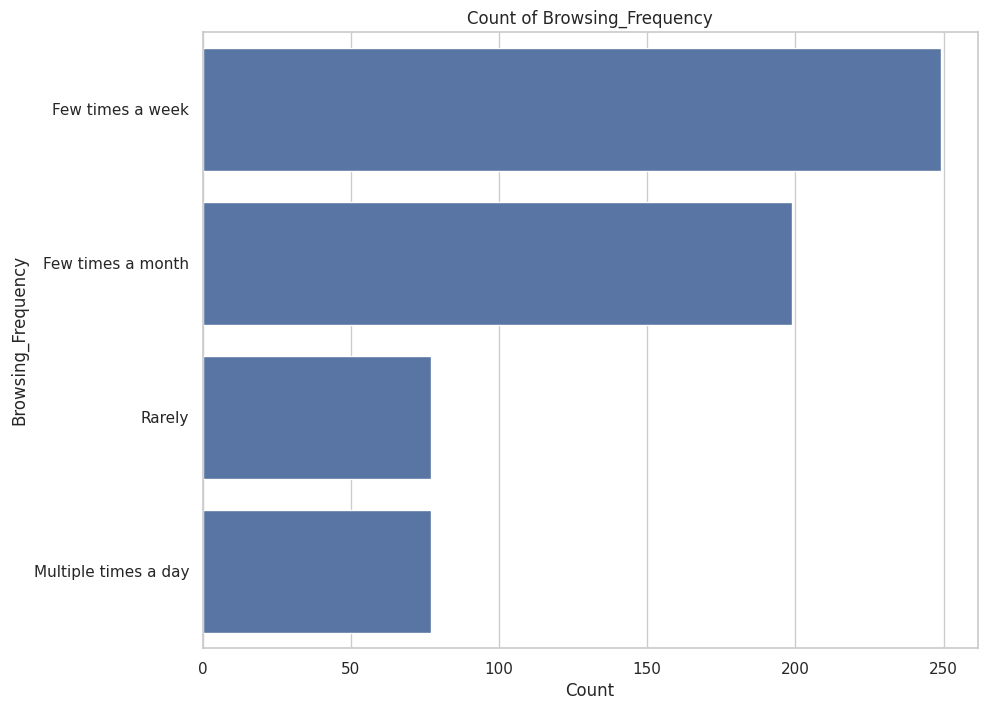

In [23]:
visualize_categorical(categorical['Browsing_Frequency'])

#### Comments

**Few times a week** is the most common response, indicating regular engagement with the Amazon platform, though not necessarily daily

Product_Search_Method
categories    223
Keyword       214
Filter        127
others         36
Name: count, dtype: int64


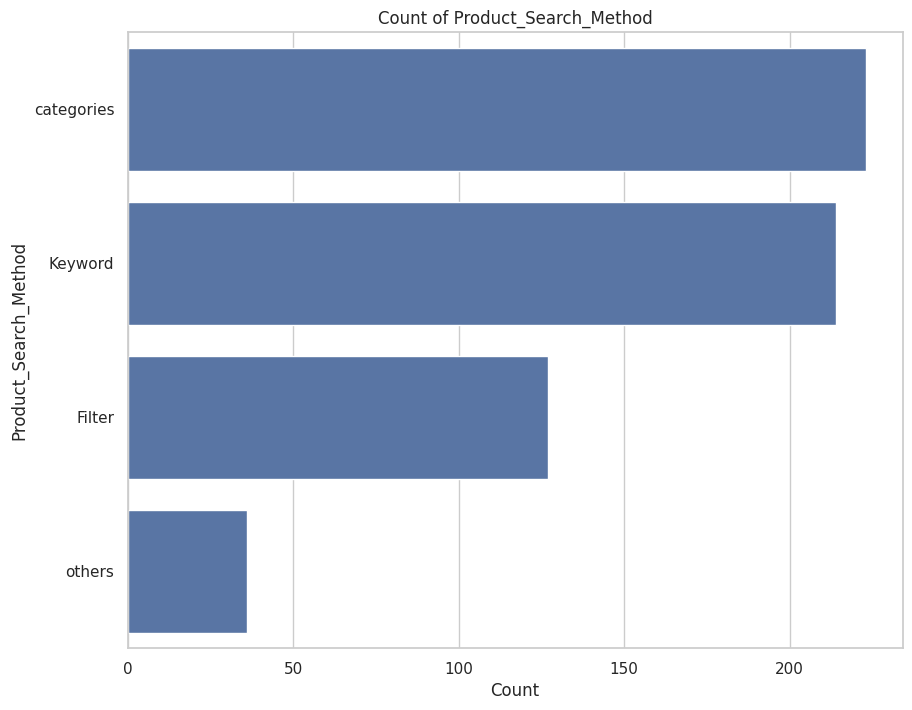

In [24]:
visualize_categorical(categorical['Product_Search_Method'])

#### Comments

The most common search method is by **categories**, followed by **keyword** searches. Fewer users utilize filters or other unspecified methods, suggesting that users prefer broad search methods, **possibly to discover a wider range of options**

Search_Result_Exploration
Multiple pages    442
First page        160
Name: count, dtype: int64


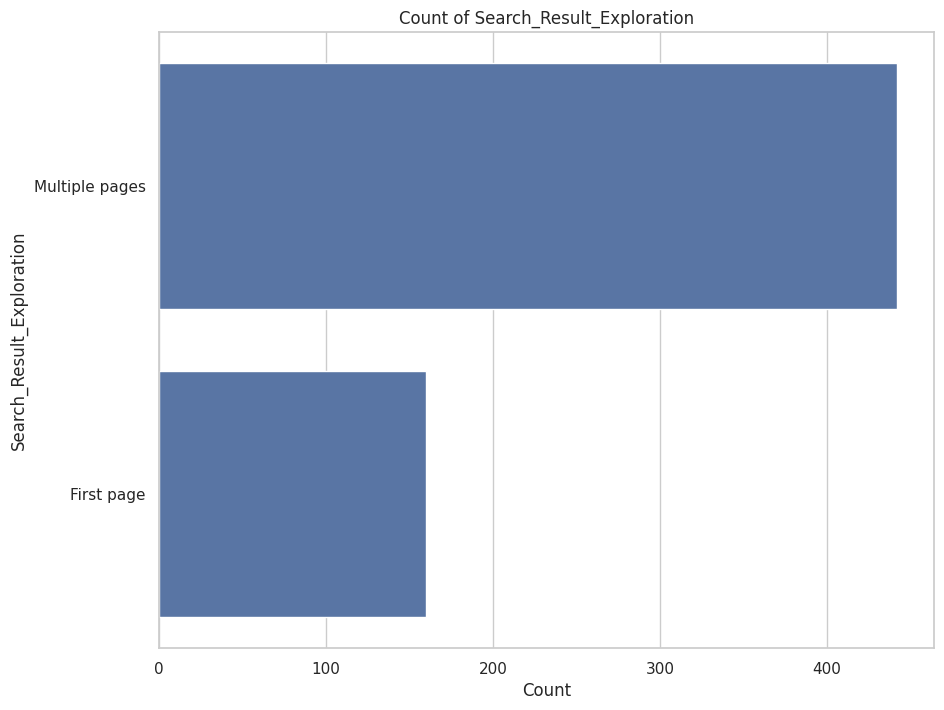

In [25]:
visualize_categorical(categorical['Search_Result_Exploration'])

#### Comments

The majority of users **tend to explore multiple pages of search results** rather than only the first page, suggesting that users are **looking for more options before making a decision**

Add_to_Cart_Browsing
Maybe    248
Yes      216
No       138
Name: count, dtype: int64


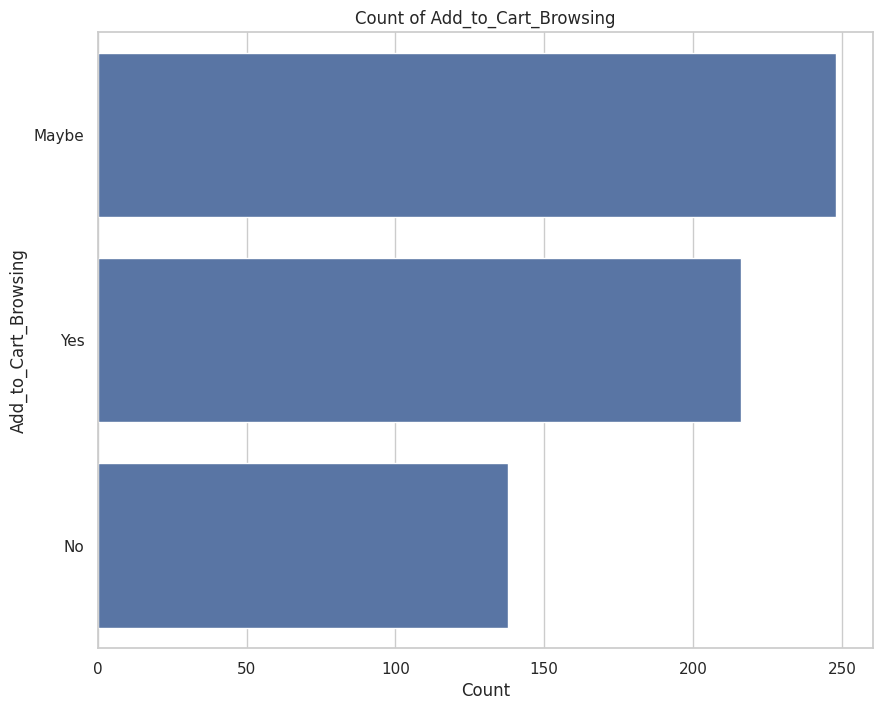

In [26]:
visualize_categorical(categorical['Add_to_Cart_Browsing'])

#### Comments

A significant number of customers **add items to their cart while browsing**, but 'Maybe' is the most common response, suggesting that customers are **selective about what they add to their cart**

Cart_Completion_Frequency
Sometimes    304
Often        158
Rarely        72
Always        47
Never         21
Name: count, dtype: int64


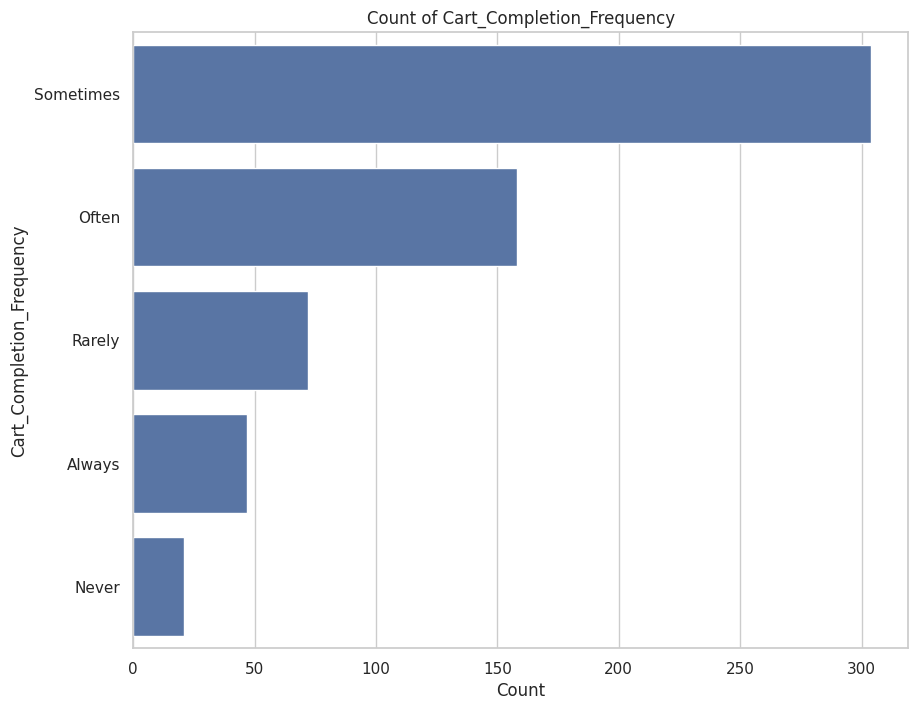

In [27]:
visualize_categorical(categorical['Cart_Completion_Frequency'])

#### Comments

**Sometimes** is the most common response for cart completion, indicating that customers **often add items to their cart but do not always complete the purchase**

Cart_Abandonment_Factors
Found a better price elsewhere                255
Changed my mind or no longer need the item    241
High shipping costs                            70
others                                         36
Name: count, dtype: int64


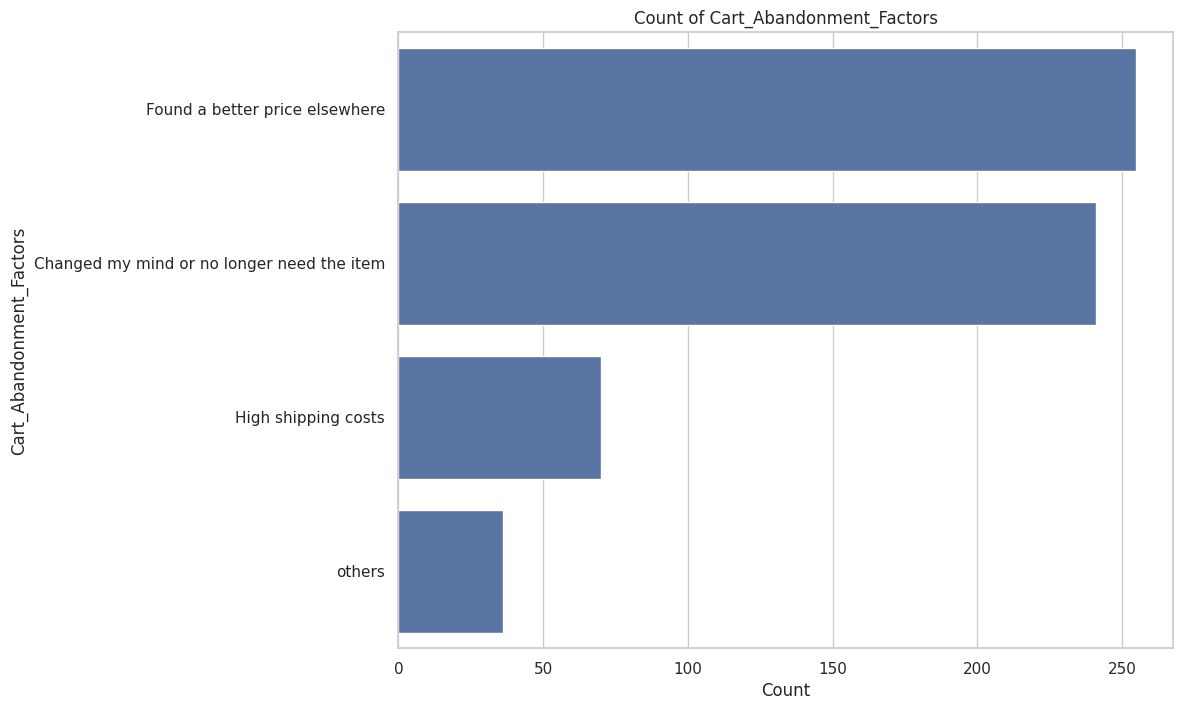

In [28]:
visualize_categorical(categorical['Cart_Abandonment_Factors'])

#### Comments

The top reasons for cart abandonment are **Found a better price elsewhere** and **Changed my mind or no longer need the item**, highlighting **price sensitivity and changing customer needs** as key factors

Saveforlater_Frequency
Sometimes    251
Often        156
Rarely        82
Never         59
Always        54
Name: count, dtype: int64


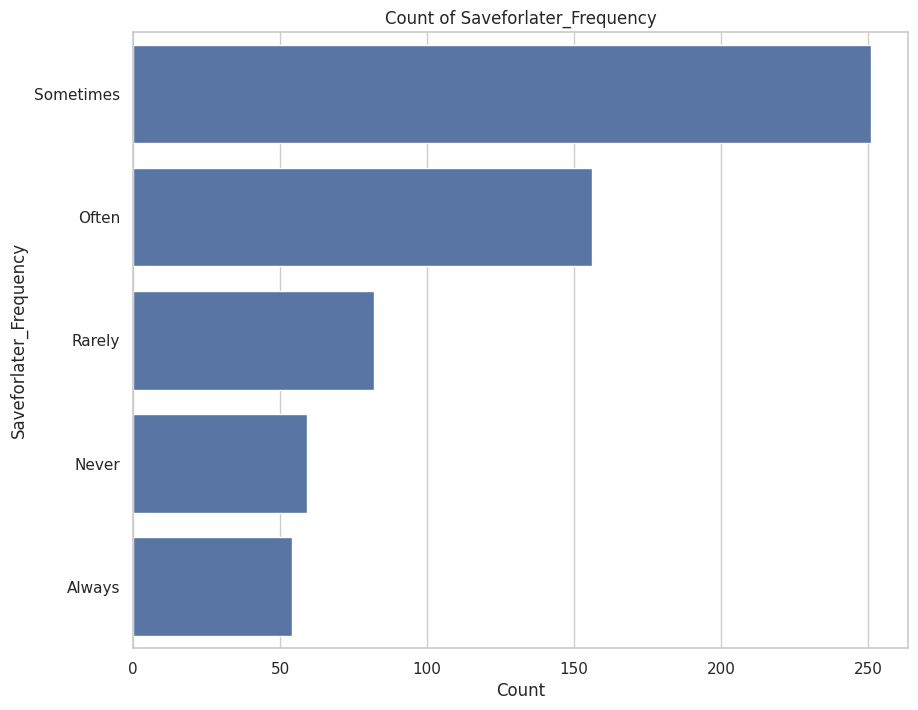

In [29]:
visualize_categorical(categorical['Saveforlater_Frequency'])

#### Comments

The 'Save for Later' feature sees moderate use, with **Sometimes** being the most common response. There is also a significant number of users who **Often** use the feature, while fewer users 'Rarely' or 'Never' use it, and a small minority 'Always' use it

Review_Left
Yes    310
No     292
Name: count, dtype: int64


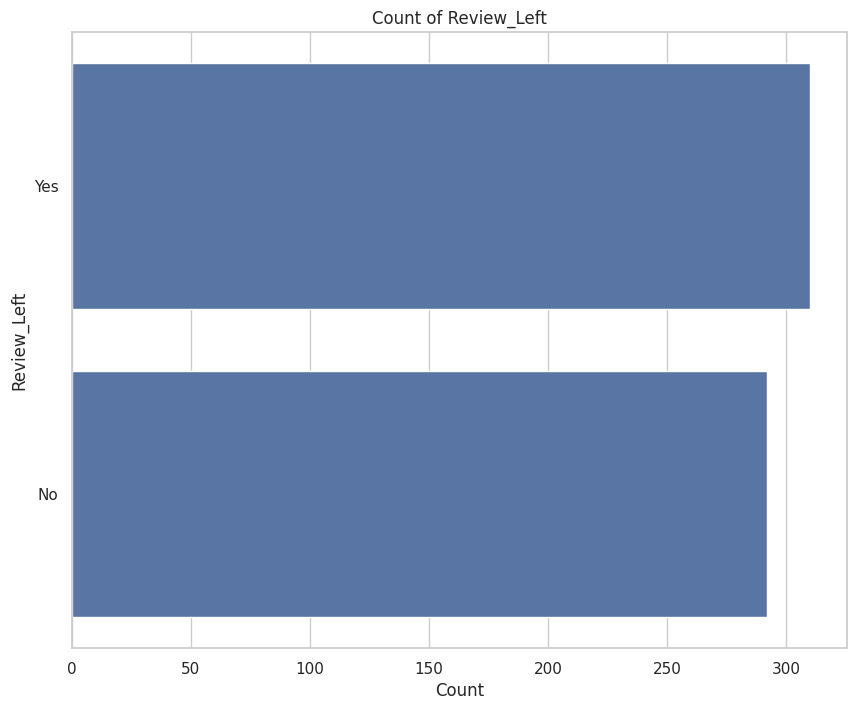

In [30]:
visualize_categorical(categorical['Review_Left'])

#### Comments

A substantial number of users have left product reviews on Amazon, indicating a **level of engagement** and **willingness to share their experiences with others**

Review_Reliability
Moderately      199
Occasionally    190
Heavily         149
Rarely           41
Never            23
Name: count, dtype: int64


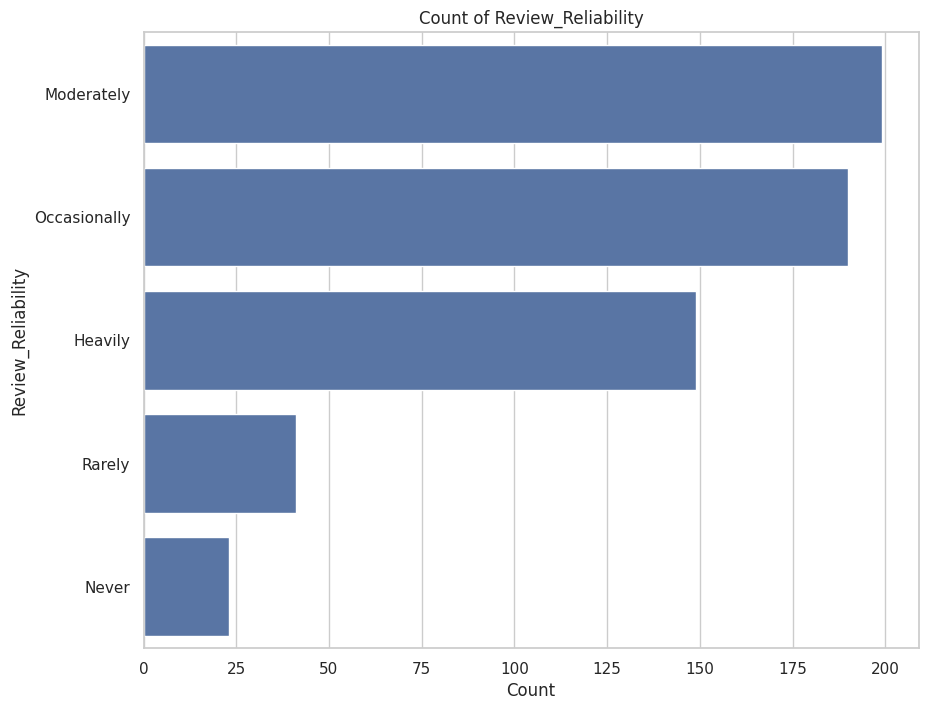

In [31]:
visualize_categorical(categorical['Review_Reliability'])

#### Comments

**Users rely on product reviews to varying degrees**, with the majority relying on them **Moderately** or **Occasionally**. A smaller group 'Heavily' relies on reviews, while few users 'Rarely' or 'Never' rely on them

Review_Helpfulness
Yes          237
Sometimes    227
No           138
Name: count, dtype: int64


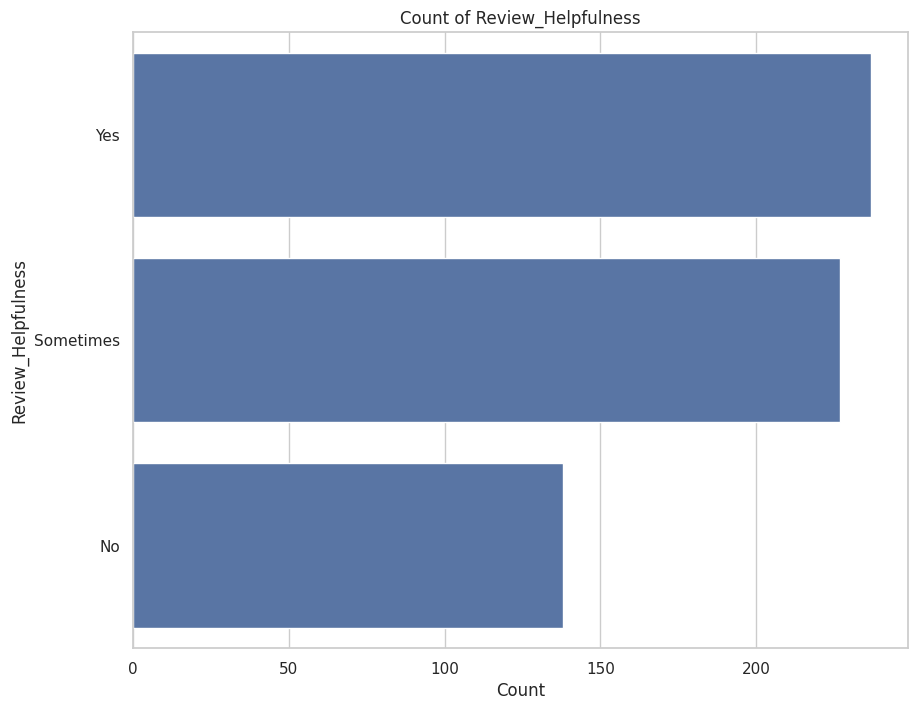

In [32]:
visualize_categorical(categorical['Review_Helpfulness'])

#### Comments

**Most users find customer reviews helpful** (Yes), with fewer users finding them only 'Sometimes' helpful and a small minority not finding them helpful ('No'). This emphasizes the **importance of customer reviews** in the shopping experience

Recommendation_Helpfulness
Sometimes    273
No           172
Yes          157
Name: count, dtype: int64


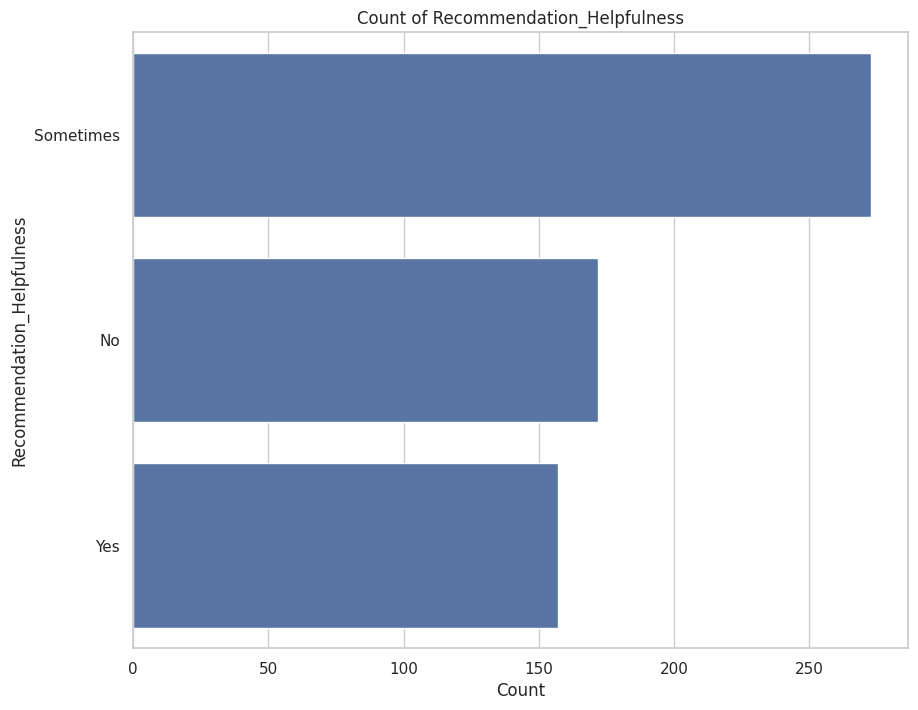

In [33]:
visualize_categorical(categorical['Recommendation_Helpfulness'])

#### Comments

Many customers find recommendations to be **Sometimes helpfu**l, indicating that while Amazon's recommendation system has an impact, **it may not always be relevant or persuasive**

Service_Appreciation
Product recommendations                185
Competitive prices                     182
Wide product selection                 150
User-friendly website/app interface     80
.                                        1
Customer service                         1
Customer service                         1
Quick delivery                           1
All the above                            1
Name: count, dtype: int64


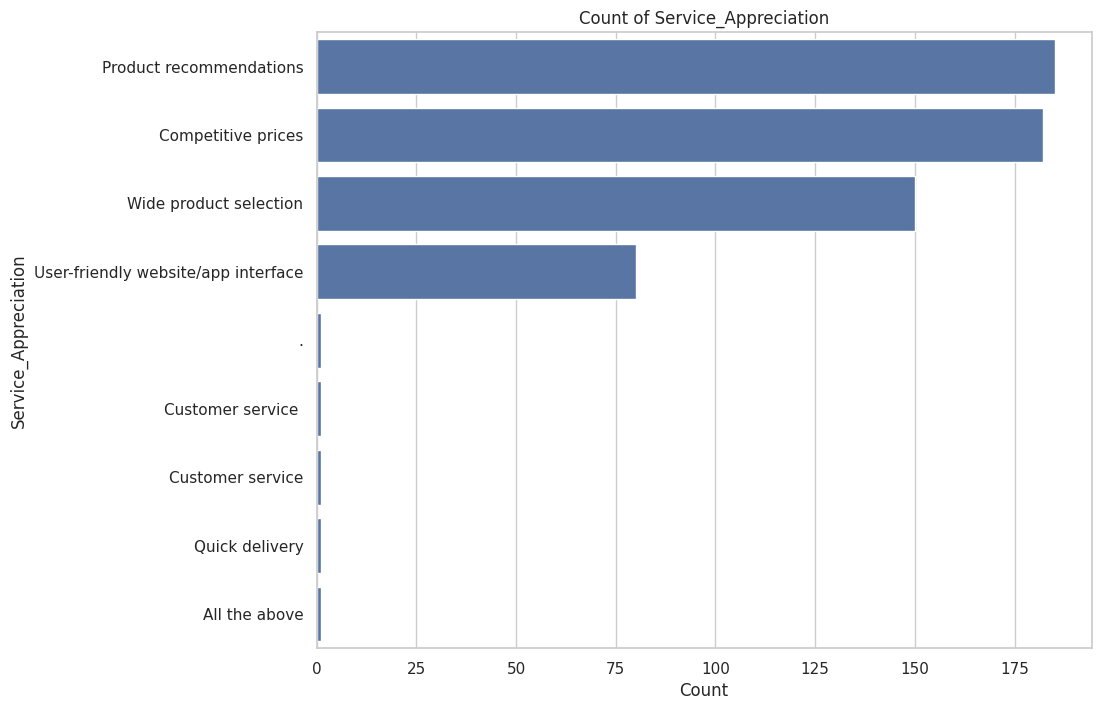

In [34]:
visualize_categorical(categorical['Service_Appreciation'])

#### Comments

**Product recommendations** and **Competitive prices** are **highly appreciated by users**, followed closely by 'Wide product selection'. 'User-friendly website/app interface' and 'Quick delivery' are also valued but to a lesser extent. A small group appreciates 'All the above,' indicating overall satisfaction with multiple aspects of Amazon's services

Improvement_Areas
Customer service responsiveness                                                   217
Product quality and accuracy                                                      159
Reducing packaging waste                                                          133
Shipping speed and reliability                                                     79
Quality of product is very poor according to the big offers                         1
I don't have any problem with Amazon                                                1
User interface of app                                                               1
Irrelevant product suggestions                                                      1
User interface                                                                      1
I have no problem with Amazon yet. But others tell me about the refund issues       1
UI                                                                                  1
Scrolling option would be much bette

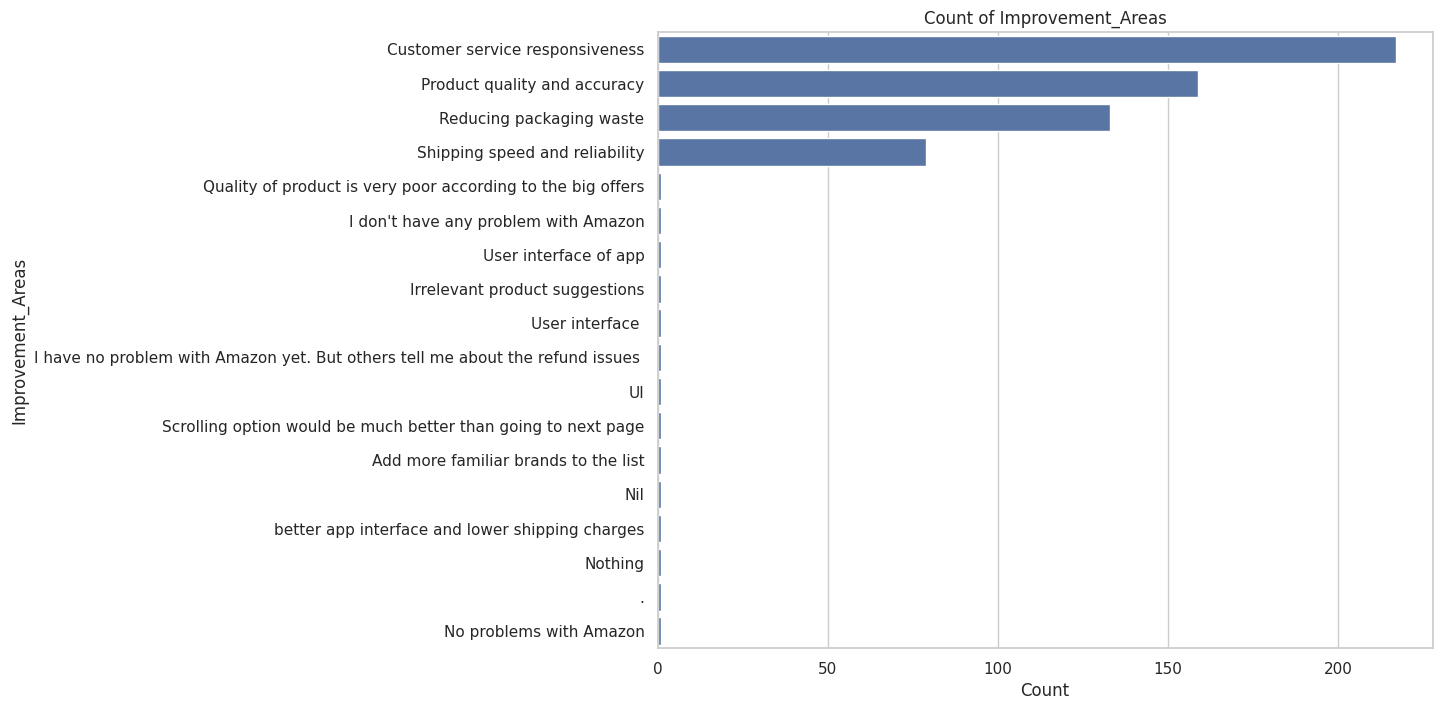

In [35]:
visualize_categorical(categorical['Improvement_Areas'])

#### Comments

Customers **appreciate Customer service responsiveness** but also **identify it as an area for improvement** along with **Product quality and accuracy** and **Shipping speed and reliability**, suggesting these are **critical factors in customer satisfaction**

In [36]:
def calculate_chi_square(df: pd.DataFrame) -> pd.DataFrame:
    """
    Calculate the Chi-Square statistic and p-value for all combinations of categorical features in a DataFrame.

    Parameters:
    ----------
    df : pandas.DataFrame
        The input DataFrame containing categorical features.

    Returns:
    -------
    pandas.DataFrame
        A DataFrame containing the Chi-Square statistic and p-value for each combination of categorical features.
        The DataFrame has three columns:
        - 'Combination': The combination of categorical columns.
        - 'Chi2': The Chi-Square statistic.
        - 'p-value': The p-value indicating the significance of the Chi-Square statistic.
    """
    categorical_columns = df.columns
    results = []

    # Iterate over categorical columns
    for col1, col2 in combinations(categorical_columns, 2):
        contingency_table = pd.crosstab(df[col1], df[col2])
        chi2, p, dof, ex = chi2_contingency(contingency_table)

        # Append the results to the list
        results.append({'Combination': f'{col1} x {col2}', 'Chi2': chi2, 'p-value': p})

    # Convert the list of results to a DataFrame
    chi2_results = pd.DataFrame(results)

    return chi2_results

#### Comments

To understand the feature dependencies I decided to create a function that pass through all categorical features and calculates the Chi-Square statistic and p-value


**Chi-Square Statistic (Chi2):** This value measures the discrepancy between the observed and expected frequencies. A higher Chi2 value indicates a greater difference between observed and expected frequencies, suggesting a potential association between the variables

**Null Hypothesis (H0):** The two categorical variables are independent (no association)

* If p-value > 0.05: **Weak evidence** against the null hypothesis, so you fail to reject it. **This suggests that the variables are likely independent**

* If p-value ≤ 0.05: **Strong evidence** against the null hypothesis, so you reject it. **This suggests that the variables are likely dependent**

In [37]:
chi2_results = calculate_chi_square(categorical)
chi2_results

Combination         Chi2  \
0                          Gender x Purchase_Frequency    33.888000   
1                         Gender x Purchase_Categories   152.855862   
2       Gender x Personalized_Recommendation_Frequency    15.773273   
3                          Gender x Browsing_Frequency    23.442982   
4                       Gender x Product_Search_Method    25.564767   
..                                                 ...          ...   
131          Review_Helpfulness x Service_Appreciation    62.608237   
132             Review_Helpfulness x Improvement_Areas    48.681189   
133  Recommendation_Helpfulness x Service_Appreciation    38.251258   
134     Recommendation_Helpfulness x Improvement_Areas    54.434726   
135           Service_Appreciation x Improvement_Areas  1344.955012   

           p-value  
0     7.025217e-04  
1     6.576433e-06  
2     1.502404e-02  
3     5.274489e-03  
4     2.406015e-03  
..             ...  
131   1.891644e-07  
132   4.922689e-02  
133   1.393337e-03  
134   1.451892e-02  
135  7.668170e-198  

[136 rows x 3 columns]

In [38]:
# Filter the DataFrame for p-values ≤ 0.05
significant_results = chi2_results[chi2_results['p-value'] <= 0.05]
significant_results

Combination         Chi2  \
0                          Gender x Purchase_Frequency    33.888000   
1                         Gender x Purchase_Categories   152.855862   
2       Gender x Personalized_Recommendation_Frequency    15.773273   
3                          Gender x Browsing_Frequency    23.442982   
4                       Gender x Product_Search_Method    25.564767   
..                                                 ...          ...   
131          Review_Helpfulness x Service_Appreciation    62.608237   
132             Review_Helpfulness x Improvement_Areas    48.681189   
133  Recommendation_Helpfulness x Service_Appreciation    38.251258   
134     Recommendation_Helpfulness x Improvement_Areas    54.434726   
135           Service_Appreciation x Improvement_Areas  1344.955012   

           p-value  
0     7.025217e-04  
1     6.576433e-06  
2     1.502404e-02  
3     5.274489e-03  
4     2.406015e-03  
..             ...  
131   1.891644e-07  
132   4.922689e-02  
133   1.393337e-03  
134   1.451892e-02  
135  7.668170e-198  

[113 rows x 3 columns]

In [39]:
significant_results.min()

Combination    Add_to_Cart_Browsing x Cart_Completion_Frequency
Chi2                                                   8.182281
p-value                                                     0.0
dtype: object

In [40]:
significant_results.max()

Combination    Service_Appreciation x Improvement_Areas
Chi2                                        1344.955012
p-value                                        0.049227
dtype: object

In [41]:
# Filter the DataFrame for p-values > 0.05
independent_results = chi2_results[chi2_results['p-value'] > 0.05]
independent_results

Combination        Chi2   p-value
5                   Gender x Search_Result_Exploration    6.858122  0.076560
8                    Gender x Cart_Abandonment_Factors   10.880971  0.283956
9                      Gender x Saveforlater_Frequency   19.069866  0.086856
10                                Gender x Review_Left    1.588956  0.661896
14                       Gender x Service_Appreciation   30.885120  0.157123
15                          Gender x Improvement_Areas   55.402462  0.312218
20      Purchase_Frequency x Search_Result_Exploration    2.957597  0.564946
23       Purchase_Frequency x Cart_Abandonment_Factors   15.678279  0.206420
43          Purchase_Categories x Service_Appreciation  243.564947  0.176181
50   Personalized_Recommendation_Frequency x Cart_A...    7.835067  0.250438
60           Browsing_Frequency x Add_to_Cart_Browsing    6.162463  0.405239
66             Browsing_Frequency x Review_Helpfulness    5.018812  0.541403
67     Browsing_Frequency x Recommendation_Helpfulness    7.463059  0.280136
75                 Product_Search_Method x Review_Left    2.779991  0.426804
80           Product_Search_Method x Improvement_Areas   55.998724  0.292811
84   Search_Result_Exploration x Saveforlater_Frequ...    5.191561  0.268201
89    Search_Result_Exploration x Service_Appreciation   12.448630  0.132281
90       Search_Result_Exploration x Improvement_Areas   10.306857  0.890252
92     Add_to_Cart_Browsing x Cart_Abandonment_Factors   10.955260  0.089769
107      Cart_Completion_Frequency x Improvement_Areas   87.750332  0.053838
122                   Review_Left x Review_Helpfulness    2.068316  0.355526
124                 Review_Left x Service_Appreciation   13.156403  0.106580
125                    Review_Left x Improvement_Areas   16.609238  0.481129

In [42]:
independent_results.min()

Combination    Add_to_Cart_Browsing x Cart_Abandonment_Factors
Chi2                                                  1.588956
p-value                                               0.053838
dtype: object

In [43]:
independent_results.max()

Combination    Search_Result_Exploration x Service_Appreciation
Chi2                                                 243.564947
p-value                                                0.890252
dtype: object

#### Comments

Here we see that are **several features likely dependents** between them, so will be necessary some transformations and calculates the correlation matrix after that

### Average Customer Profile

The average Amazon customer is a **20-30 years old female** who shops a **few times a month**, mainly for **Beauty** and Personal Care, Clothing and **Fashion**, **Home** and Kitchen, and **Groceries** and Gourmet Food. They browse the platform a **few times a week**, often search by **categories or keywords**, and **explore multiple pages** of search results. Customers add items to their cart **selectively** and often abandon purchases due to **better prices elsewhere** or **changing their minds**. They value customer **reviews and find them helpful**, with personalized recommendations having a **moderate impact**. Customers appreciate **competitive prices**, **product recommendations**, and a **wide product selection** but identify areas for improvement in **customer service**, **product quality**, and **shipping speed**. Overall, shopping satisfaction is **moderate**

### Feature Engineering

In [44]:
# Drop NaN
df = df.dropna()

# Drop Timestamp
df = df.drop(columns=['Timestamp'])

# Copy
df_0 = df.copy()

#### Age

In [45]:
# Get the top 10 records by age
top_10_age = df_0.nlargest(10, 'age')

# Get the last 10 records by age
last_10_age = df_0.nsmallest(10, 'age')

# Display the results
print("Top 10 records by age:")
print(top_10_age['age'])

print("\nLast 10 records by age:")
print(last_10_age['age'])

Top 10 records by age:
459    67
489    67
20     64
150    63
92     62
163    60
536    60
574    60
80     58
173    57
Name: age, dtype: int64

Last 10 records by age:
442     3
578    12
237    15
377    15
16     16
23     16
311    16
325    16
329    16
169    17
Name: age, dtype: int64


In [46]:
# Drop row 442 with age = 3 and 578 with age = 12
df_0 = df_0.drop(index=[442,578])

In [47]:
# Break the series into quartiles intervals and visualize the min and max with every quartile
quartiles = pd.qcut(df_0['age'], 4)
quartile_summary = df_0.groupby(quartiles)['age'].agg(['min', 'max'])

# Display the quartile summary
print("\nQuartile summary:")
print(quartile_summary)


Quartile summary:
                min  max
age                     
(14.999, 23.0]   15   23
(23.0, 26.5]     24   26
(26.5, 36.0]     27   36
(36.0, 67.0]     37   67


<ipython-input-47-38bb30a55b24>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  quartile_summary = df_0.groupby(quartiles)['age'].agg(['min', 'max'])


In [48]:
# Break the age column into groups
age_bins = [0, 23, 26, 36, 67]
age_labels = ['15-23', '24-26', '27-36', '37-67']
df_0['Age_Group'] = pd.cut(df_0['age'], bins=age_bins, labels=age_labels, right=False)
df_0['Age_Group'].value_counts()

Age_Group
24-26    199
27-36    168
37-67    156
15-23     73
Name: count, dtype: int64

In [49]:
# Create dummy variables for the age groups
df_1 = pd.get_dummies(df_0, columns=['Age_Group'], drop_first=True)

# Drop age column
df_1 = df_1.drop(columns=['age'])

# Display the DataFrame with dummy variables
df_1[['Age_Group_24-26', 'Age_Group_27-36','Age_Group_37-67']].head()

Age_Group_24-26  Age_Group_27-36  Age_Group_37-67
0             True            False            False
1             True            False            False
2             True            False            False
3             True            False            False
4            False            False            False

#### Customer_Reviews_Importance, Personalized_Recommendation_Frequency and Rating_Accuracy

#### Comments

**Ordinal Encoding:**

**When to Use:** If the feature has a meaningful order and the clustering algorithm can handle ordinal data (e.g., hierarchical clustering, KMeans).

**Pros:** Maintains the ordinal relationship between the values.

**Cons:** Assumes that the distance between consecutive values is uniform, which may not always be the case.

**One-Hot Encoding:**

**When to Use:** If you want to treat each rating as a separate category without assuming any order.

**Pros:** Does not impose any ordinal relationship; each category is treated independently.

**Cons:** Increases the dimensionality of the dataset, which may affect the performance of some clustering algorithms.

**Binning:**

**When to Use:** If you want to simplify the feature by grouping values into broader categories.

**Pros:** Reduces the number of distinct values, which can make the clustering process more efficient.

**Cons:** May lose some information by combining values into broader categories.

In [50]:
# Rename columns (categorical and numerical)
df_1 = df_1.rename(columns={"Personalized_Recommendation_Frequency": "Personalized_Recommendation_Usage", "Personalized_Recommendation_Frequency ": "Personalized_Recommendation_Frequency", "Rating_Accuracy ": "Rating_Accuracy"})

In [51]:
df_1['Customer_Reviews_Importance'].value_counts()

Customer_Reviews_Importance
3    213
1    168
2    115
4     64
5     38
Name: count, dtype: int64

In [52]:
df_1['Personalized_Recommendation_Frequency'].value_counts()

Personalized_Recommendation_Frequency
3    237
2    168
1     80
4     78
5     35
Name: count, dtype: int64

In [53]:
df_1['Rating_Accuracy'].value_counts()

Rating_Accuracy
3    285
2    179
1     58
4     55
5     21
Name: count, dtype: int64

In [54]:
df_1['Shopping_Satisfaction'].value_counts()

Shopping_Satisfaction
3    208
2    192
1    115
4     66
5     17
Name: count, dtype: int64

In [55]:
# Apply ordinal encoding (keep the original ordinal values)
df_1['Customer_Reviews_Importance'] = df_1['Customer_Reviews_Importance'].astype(int)
df_1['Personalized_Recommendation_Frequency'] = df_1['Personalized_Recommendation_Frequency'].astype(int)
df_1['Rating_Accuracy'] = df_1['Rating_Accuracy'].astype(int)
df_1['Shopping_Satisfaction'] = df_1['Shopping_Satisfaction'].astype(int)

In [56]:
# Binary encoding for Review_Left
df_1['Review_Left'] = df_1['Review_Left'].map({'Yes': 1, 'No': 0})
df_1['Review_Left'].value_counts()

Review_Left
1    308
0    290
Name: count, dtype: int64

#### Features with ≤ 4 categories

In [57]:
# Function to capitalize each word and replace spaces with underscores
def transform_category(value):
    return '_'.join([word.capitalize() for word in value.split()])

# Function to clean the text
def clean_text(value):
    return value.strip().lower()

In [58]:
# List of columns to transform
columns_to_transform = [
    'Gender',
    'Personalized_Recommendation_Usage',
    'Browsing_Frequency',
    'Product_Search_Method',
    'Search_Result_Exploration',
    'Add_to_Cart_Browsing',
    'Cart_Abandonment_Factors',
    'Review_Helpfulness',
    'Recommendation_Helpfulness'
]

# Apply the transformation to each specified column
for column in columns_to_transform:
    df_1[column] = df_1[column].apply(transform_category)

In [59]:
df_1['Search_Result_Exploration'].value_counts()

Search_Result_Exploration
Multiple_Pages    439
First_Page        159
Name: count, dtype: int64

In [60]:
# Apply one-hot encoding
df_2 = pd.get_dummies(df_1, columns=[
    'Gender',
    'Personalized_Recommendation_Usage',
    'Browsing_Frequency',
    'Product_Search_Method',
    'Search_Result_Exploration',
    'Add_to_Cart_Browsing',
    'Cart_Abandonment_Factors',
    'Review_Helpfulness',
    'Recommendation_Helpfulness'
])

# Identify the smallest category for each feature and drop it
categories_to_drop = {
    'Gender': 'Gender_' + df_1['Gender'].value_counts().idxmin(),
    'Personalized_Recommendation_Usage': 'Personalized_Recommendation_Usage_' + df_1['Personalized_Recommendation_Usage'].value_counts().idxmin(),
    'Browsing_Frequency': 'Browsing_Frequency_' + df_1['Browsing_Frequency'].value_counts().idxmin(),
    'Product_Search_Method': 'Product_Search_Method_' + df_1['Product_Search_Method'].value_counts().idxmin(),
    'Search_Result_Exploration': 'Search_Result_Exploration_' + df_1['Search_Result_Exploration'].value_counts().idxmin(),
    'Add_to_Cart_Browsing': 'Add_to_Cart_Browsing_' + df_1['Add_to_Cart_Browsing'].value_counts().idxmin(),
    'Cart_Abandonment_Factors': 'Cart_Abandonment_Factors_' + df_1['Cart_Abandonment_Factors'].value_counts().idxmin(),
    'Review_Helpfulness': 'Review_Helpfulness_' + df_1['Review_Helpfulness'].value_counts().idxmin(),
    'Recommendation_Helpfulness': 'Recommendation_Helpfulness_' + df_1['Recommendation_Helpfulness'].value_counts().idxmin()
}

# Drop the columns
df_2.drop(columns=categories_to_drop.values(), inplace=True)

#### Features with more than 4 categories

In [61]:
# Grouping Purchase_Frequency
df_2['Purchase_Frequency'] = df_2['Purchase_Frequency'].replace({
    'Less than once a month': 'Monthly',
    'Once a month': 'Monthly',
    'Few times a month': 'Few_Times_A_Month',
    'Once a week': 'Weekly',
    'Multiple times a week': 'Multiple_Times_A_Week'
})
df_2['Purchase_Frequency'].value_counts()

Purchase_Frequency
Monthly                  229
Few_Times_A_Month        202
Weekly                   112
Multiple_Times_A_Week     55
Name: count, dtype: int64

In [62]:
# Grouping Purchase_Categories
df_2['Purchase_Categories'] = df_2['Purchase_Categories'].apply(lambda x: 'Mixed' if ';' in x else x)

# Capitalize each word and replace spaces with underscores
df_2['Purchase_Categories'] = df_2['Purchase_Categories'].apply(transform_category)

df_2['Purchase_Categories'].value_counts()

Purchase_Categories
Mixed                         303
Beauty_And_Personal_Care      105
Clothing_And_Fashion          105
Others                         48
Home_And_Kitchen               23
Groceries_And_Gourmet_Food     14
Name: count, dtype: int64

In [63]:
# Grouping Cart_Completion_Frequency
df_2['Cart_Completion_Frequency'] = df_2['Cart_Completion_Frequency'].replace({
    'Rarely': 'Rarely-Never',
    'Never': 'Rarely-Never',
    'Sometimes': 'Sometimes',
    'Often': 'Often',
    'Always': 'Always'
})
df_2['Cart_Completion_Frequency'].value_counts()

Cart_Completion_Frequency
Sometimes       301
Often           158
Rarely-Never     93
Always           46
Name: count, dtype: int64

In [64]:
# Grouping Saveforlater_Frequency
df_2['Saveforlater_Frequency'] = df_2['Saveforlater_Frequency'].replace({
    'Rarely': 'Rarely-Never',
    'Never': 'Rarely-Never',
    'Sometimes': 'Sometimes',
    'Often': 'Often',
    'Always': 'Always'
})
df_2['Saveforlater_Frequency'].value_counts()

Saveforlater_Frequency
Sometimes       251
Often           153
Rarely-Never    141
Always           53
Name: count, dtype: int64

In [65]:
# Grouping Review_Reliability
df_2['Review_Reliability'] = df_2['Review_Reliability'].replace({
    'Rarely': 'Rarely-Never',
    'Never': 'Rarely-Never',
    'Occasionally': 'Occasionally',
    'Moderately': 'Moderately',
    'Heavily': 'Heavily'
})
df_2['Review_Reliability'].value_counts()

Review_Reliability
Moderately      196
Occasionally    189
Heavily         149
Rarely-Never     64
Name: count, dtype: int64

In [66]:
# Cleaning some spaces
df_2['Service_Appreciation'] = df_2['Service_Appreciation'].apply(clean_text)

# Grouping Service_Appreciation with cleaned values
df_2['Service_Appreciation'] = df_2['Service_Appreciation'].replace({
    'product recommendations': 'Product_Recommendations',
    'competitive prices': 'Competitive_Prices',
    'wide product selection': 'Wide_Product_Selection',
    'user-friendly website/app interface': 'User-friendly_Web-App_Interface',
    'customer service': 'Others',
    'quick delivery': 'Others',
    'all the above': 'Others',
    '.': 'Others'
})
df_2['Service_Appreciation'].value_counts()

Service_Appreciation
Product_Recommendations            185
Competitive_Prices                 181
Wide_Product_Selection             148
User-friendly_Web-App_Interface     79
Others                               5
Name: count, dtype: int64

In [67]:
# Cleaning some spaces
df_2['Improvement_Areas'] = df_2['Improvement_Areas'].apply(clean_text)

# Grouping Improvement_Areas
df_2['Improvement_Areas'] = df_2['Improvement_Areas'].replace({
    'customer service responsiveness': 'Customer_Service_Responsiveness',
    'product quality and accuracy': 'Product_Quality_And_Accuracy',
    'reducing packaging waste': 'Reducing_Packaging_Waste',
    'shipping speed and reliability': 'Shipping_Speed_And_Reliability',
    'quality of product is very poor according to the big offers': 'Others',
    'i don\'t have any problem with amazon': 'Others',
    'user interface of app': 'Others',
    'irrelevant product suggestions': 'Others',
    'user interface': 'Others',
    'i have no problem with amazon yet. but others tell me about the refund issues': 'Others',
    'ui': 'Others',
    'scrolling option would be much better than going to next page': 'Others',
    'add more familiar brands to the list': 'Others',
    'nil': 'Others',
    'better app interface and lower shipping charges': 'Others',
    'nothing': 'Others',
    '.': 'Others',
    'no problems with amazon': 'Others'
})
df_2['Improvement_Areas'].value_counts()

Improvement_Areas
Customer_Service_Responsiveness    214
Product_Quality_And_Accuracy       159
Reducing_Packaging_Waste           133
Shipping_Speed_And_Reliability      78
Others                              14
Name: count, dtype: int64

In [68]:
# Apply get_dummies to the categorical features
df_3 = pd.get_dummies(df_2, columns=[
    'Purchase_Frequency',
    'Purchase_Categories',
    'Cart_Completion_Frequency',
    'Saveforlater_Frequency',
    'Review_Reliability',
    'Service_Appreciation',
    'Improvement_Areas'
])

# Identify the smallest category for each feature and drop it
categories_to_drop = {
    'Purchase_Frequency': 'Purchase_Frequency_' + df_2['Purchase_Frequency'].value_counts().idxmin(),
    'Purchase_Categories': 'Purchase_Categories_' + df_2['Purchase_Categories'].value_counts().idxmin(),
    'Cart_Completion_Frequency': 'Cart_Completion_Frequency_' + df_2['Cart_Completion_Frequency'].value_counts().idxmin(),
    'Saveforlater_Frequency': 'Saveforlater_Frequency_' + df_2['Saveforlater_Frequency'].value_counts().idxmin(),
    'Review_Reliability': 'Review_Reliability_' + df_2['Review_Reliability'].value_counts().idxmin(),
    'Service_Appreciation': 'Service_Appreciation_' + df_2['Service_Appreciation'].value_counts().idxmin(),
    'Improvement_Areas': 'Improvement_Areas_' + df_2['Improvement_Areas'].value_counts().idxmin()
}

# Drop the smallest category columns
df_3.drop(columns=categories_to_drop.values(), inplace=True)

In [69]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 598 entries, 0 to 601
Data columns (total 54 columns):
 #   Column                                                               Non-Null Count  Dtype
---  ------                                                               --------------  -----
 0   Customer_Reviews_Importance                                          598 non-null    int64
 1   Review_Left                                                          598 non-null    int64
 2   Personalized_Recommendation_Frequency                                598 non-null    int64
 3   Rating_Accuracy                                                      598 non-null    int64
 4   Shopping_Satisfaction                                                598 non-null    int64
 5   Age_Group_24-26                                                      598 non-null    bool 
 6   Age_Group_27-36                                                      598 non-null    bool 
 7   Age_Group_37-67                

In [70]:
# Convert all boolean columns to integers
boolean_columns = df_3.select_dtypes(include='bool').columns
df_3[boolean_columns] = df_3[boolean_columns].astype(int)

# Display the transformed DataFrame
df_3.head()

Customer_Reviews_Importance  Review_Left  \
0                            1            1   
1                            1            0   
2                            2            0   
3                            5            1   
4                            1            0   

   Personalized_Recommendation_Frequency  Rating_Accuracy  \
0                                      2                1   
1                                      2                3   
2                                      4                3   
3                                      3                3   
4                                      4                2   

   Shopping_Satisfaction  Age_Group_24-26  Age_Group_27-36  Age_Group_37-67  \
0                      1                1                0                0   
1                      2                1                0                0   
2                      3                1                0                0   
3                      4                1                0                0   
4                      2                0                0                0   

   Gender_Female  Gender_Male  ...  Review_Reliability_Moderately  \
0              1            0  ...                              0   
1              1            0  ...                              0   
2              0            0  ...                              0   
3              1            0  ...                              0   
4              1            0  ...                              0   

   Review_Reliability_Occasionally  Service_Appreciation_Competitive_Prices  \
0                                1                                        1   
1                                0                                        0   
2                                1                                        1   
3                                0                                        1   
4                                0                                        1   

   Service_Appreciation_Product_Recommendations  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   Service_Appreciation_User-friendly_Web-App_Interface  \
0                                                  0      
1                                                  0      
2                                                  0      
3                                                  0      
4                                                  0      

   Service_Appreciation_Wide_Product_Selection  \
0                                            0   
1                                            1   
2                                            0   
3                                            0   
4                                            0   

   Improvement_Areas_Customer_Service_Responsiveness  \
0                                                  0   
1                                                  0   
2                                                  0   
3                                                  0   
4                                                  0   

   Improvement_Areas_Product_Quality_And_Accuracy  \
0                                               0   
1                                               0   
2                                               1   
3                                               1   
4                                               1   

   Improvement_Areas_Reducing_Packaging_Waste  \
0                                           1   
1                                           1   
2                                           0   
3                                           0   
4                                           0   

   Improvement_Areas_Shipping_Speed_And_Reliability  
0                   

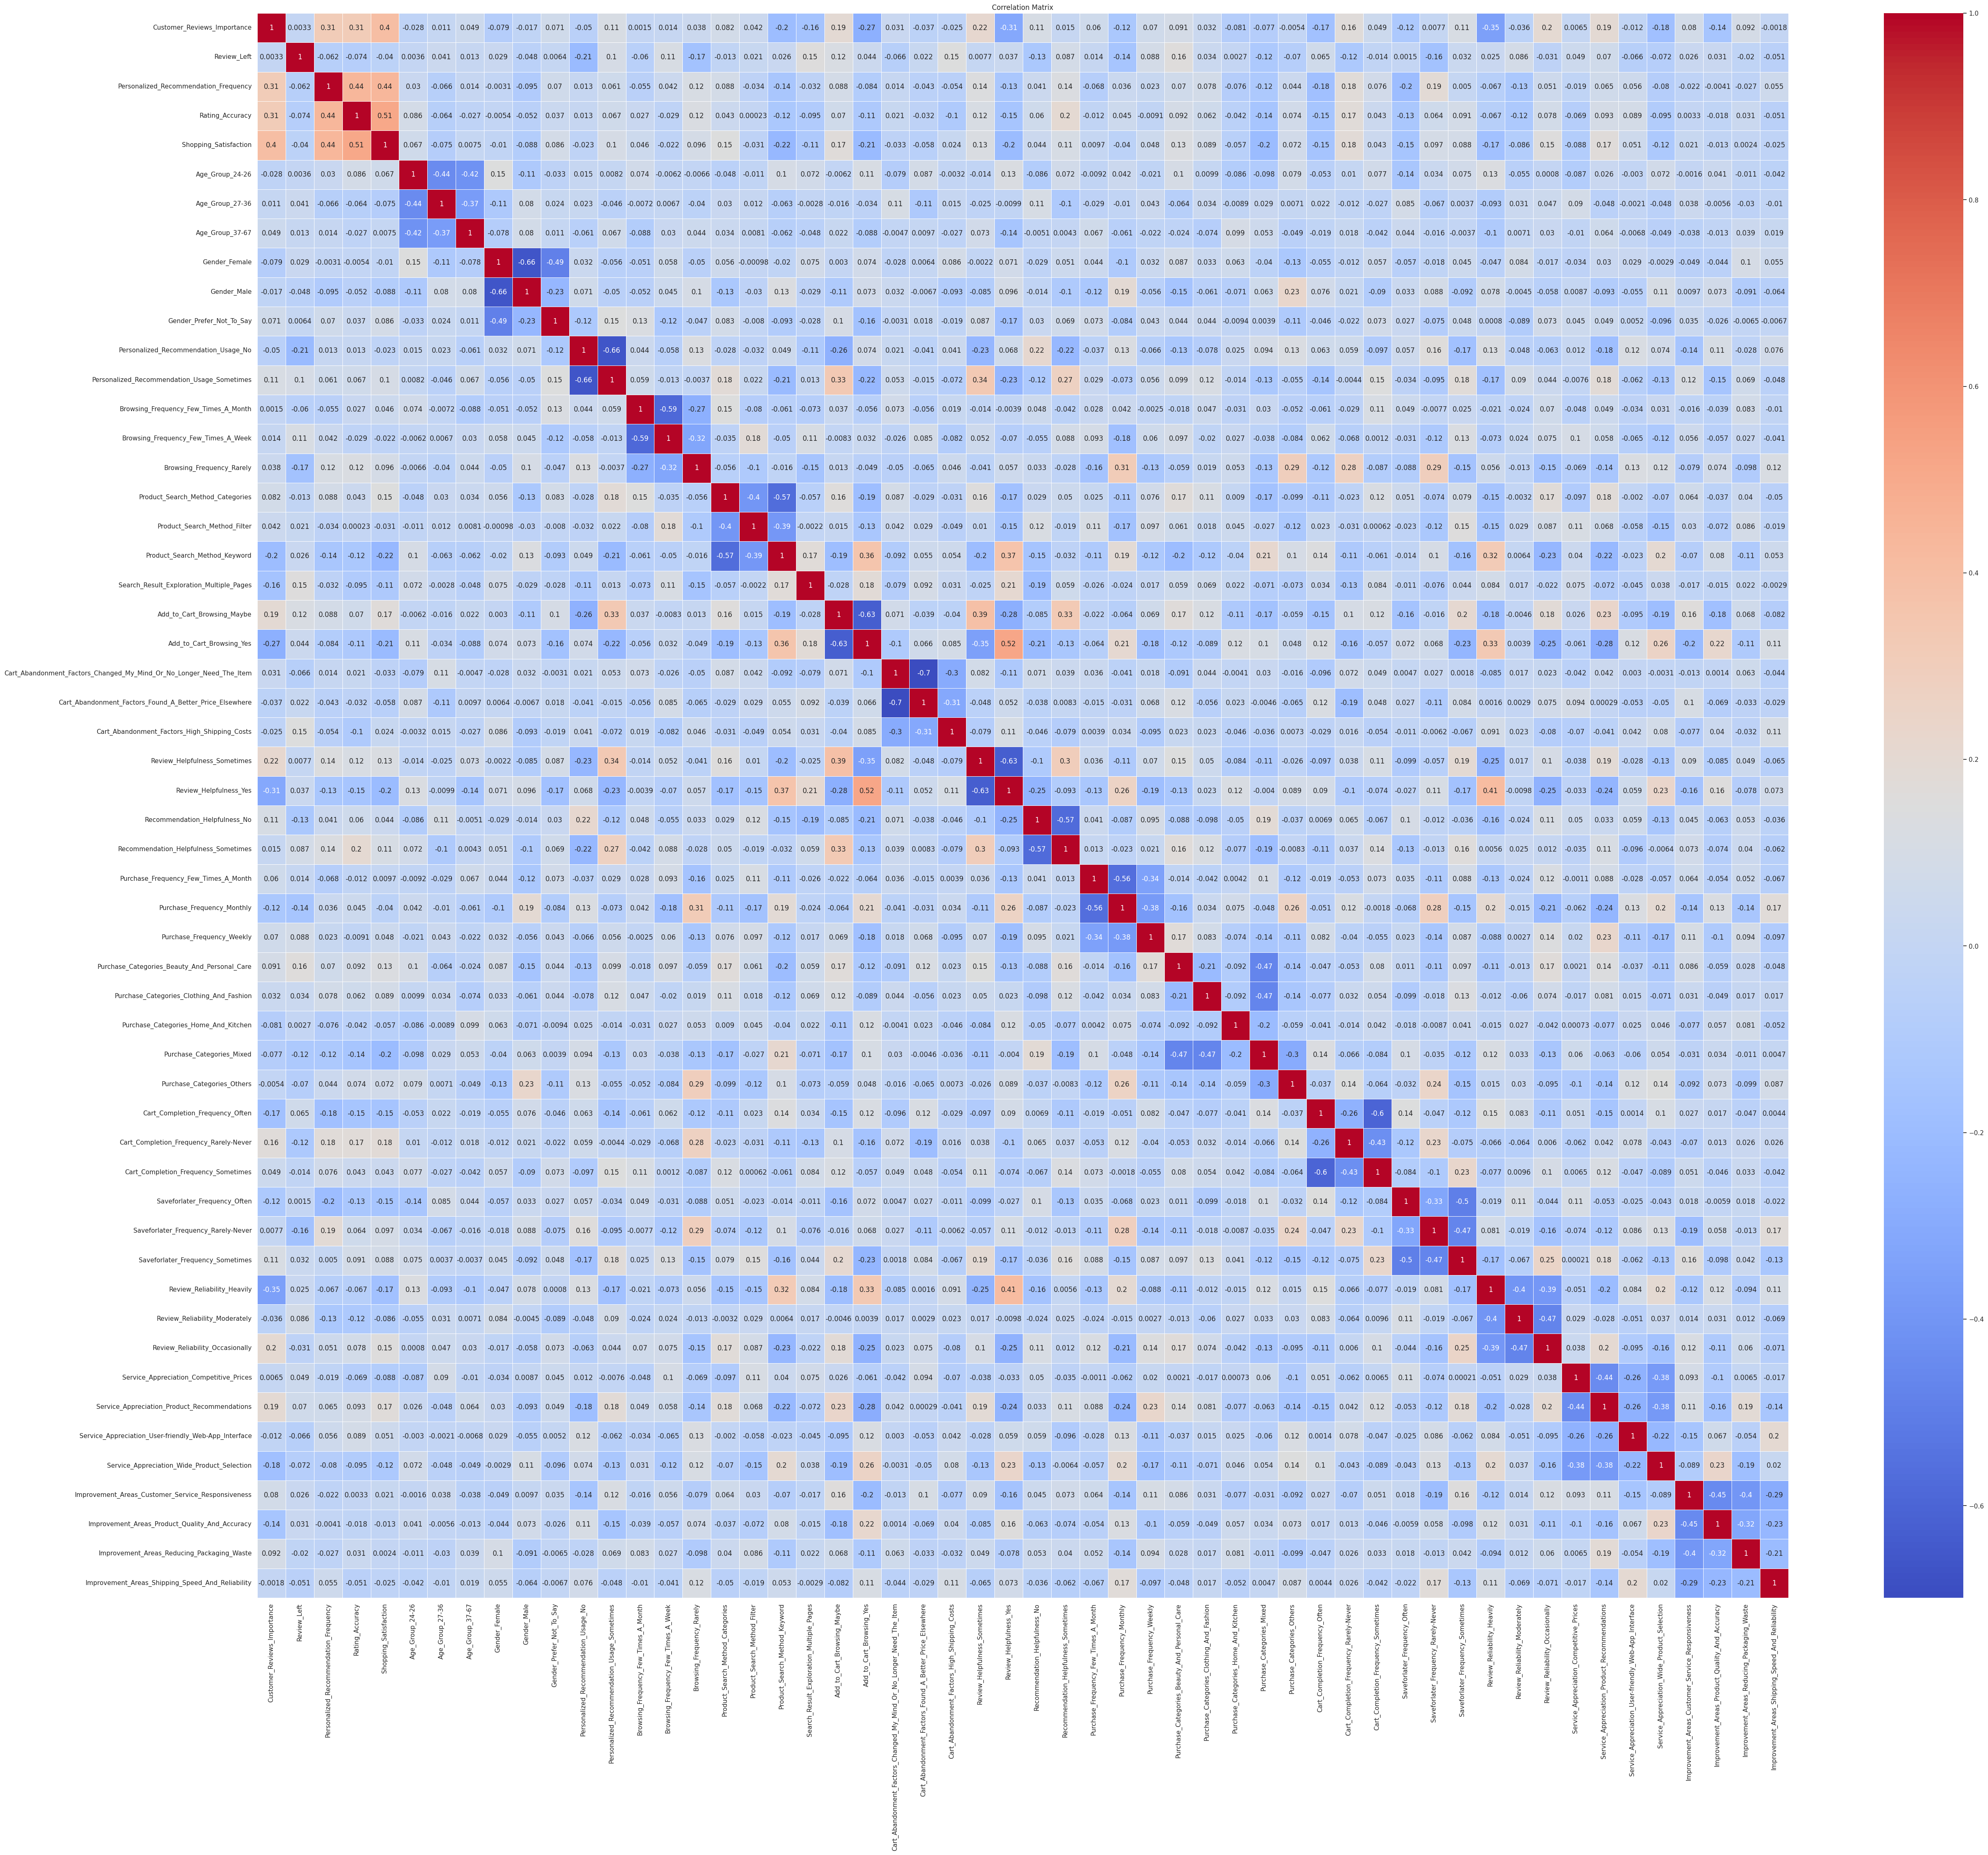

In [71]:
# Correlation Matrix
correlation_matrix = df_3.corr()
plt.figure(figsize=(60, 50))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

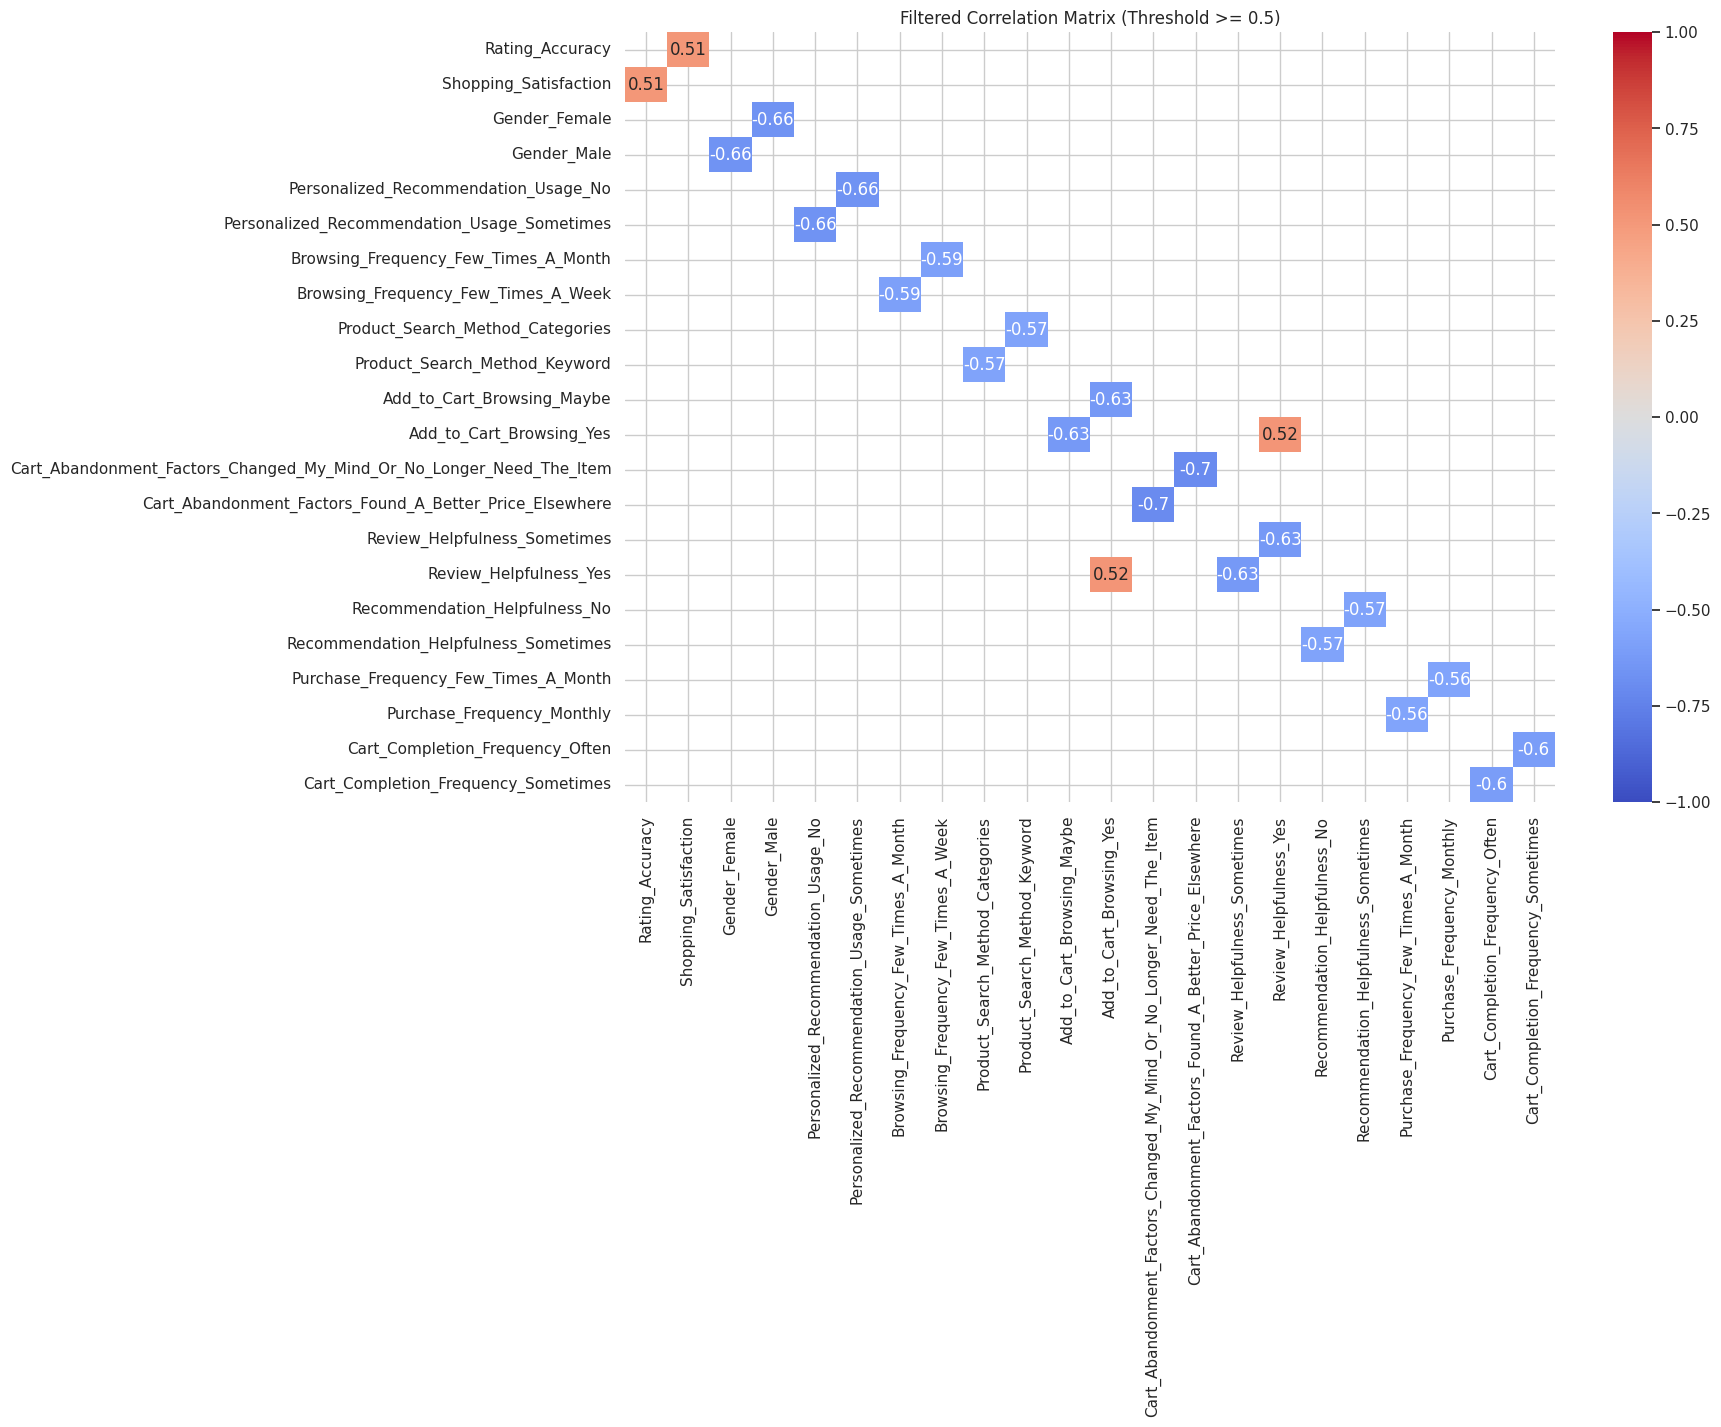

In [72]:
# Define the threshold for significant correlations
threshold = 0.5

# Create a mask to filter the correlations above the threshold
mask = np.abs(correlation_matrix) >= threshold

# Filter the correlation matrix
filtered_corr_matrix = correlation_matrix[mask]

# Remove self-correlations (correlation of a variable with itself, which is always 1)
np.fill_diagonal(filtered_corr_matrix.values, np.nan)

# Drop rows and columns with all NaN values (no significant correlations)
filtered_corr_matrix = filtered_corr_matrix.dropna(how='all').dropna(axis=1, how='all')

# Visualize the filtered correlation matrix using a heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(filtered_corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, cbar=True)
plt.title('Filtered Correlation Matrix (Threshold >= 0.5)')
plt.show()

#### Comments

**Strong Positive Correlations (close to +1):** Pairs of features that have strong positive correlations will move in the same direction. For example, if one increases, the other tends to increase as well. In your heatmap, "Gender_Female" and "Gender_Male" show a strong negative correlation of -0.66, which makes sense because they are **mutually exclusive categories**.

**Strong Negative Correlations (close to -1):** Pairs of features that have strong negative correlations will move in opposite directions. For example, if one increases, the other tends to decrease. In your heatmap, "Cart_Abandonment_Factors_Changed_My_Mind_Or_No_Longer_Need_The_Item" and "Cart_Abandonment_Factors_Found_A_Better_Price_Elsewhere" show a strong negative correlation of -0.7, indicating that **customers who abandon carts because they found a better price elsewhere are less likely to abandon them because they changed their minds or no longer need the item**.

**IMPORTANT: Correlation does not imply causation**

In [73]:
filtered_corr_matrix.columns

Index(['Rating_Accuracy', 'Shopping_Satisfaction', 'Gender_Female',
       'Gender_Male', 'Personalized_Recommendation_Usage_No',
       'Personalized_Recommendation_Usage_Sometimes',
       'Browsing_Frequency_Few_Times_A_Month',
       'Browsing_Frequency_Few_Times_A_Week',
       'Product_Search_Method_Categories', 'Product_Search_Method_Keyword',
       'Add_to_Cart_Browsing_Maybe', 'Add_to_Cart_Browsing_Yes',
       'Cart_Abandonment_Factors_Changed_My_Mind_Or_No_Longer_Need_The_Item',
       'Cart_Abandonment_Factors_Found_A_Better_Price_Elsewhere',
       'Review_Helpfulness_Sometimes', 'Review_Helpfulness_Yes',
       'Recommendation_Helpfulness_No', 'Recommendation_Helpfulness_Sometimes',
       'Purchase_Frequency_Few_Times_A_Month', 'Purchase_Frequency_Monthly',
       'Cart_Completion_Frequency_Often',
       'Cart_Completion_Frequency_Sometimes'],
      dtype='object')

In [74]:
df_4 = df_3.copy()

In [75]:
# Feature Selection
features_to_drop = ['Gender_Male', 'Personalized_Recommendation_Usage_Sometimes', 'Browsing_Frequency_Few_Times_A_Week',
                    'Product_Search_Method_Keyword', 'Add_to_Cart_Browsing_Maybe', 'Cart_Abandonment_Factors_Found_A_Better_Price_Elsewhere',
                    'Review_Helpfulness_Sometimes', 'Recommendation_Helpfulness_Sometimes', 'Purchase_Frequency_Few_Times_A_Month', 'Cart_Completion_Frequency_Sometimes']
df_4 = df_4.drop(columns=features_to_drop)

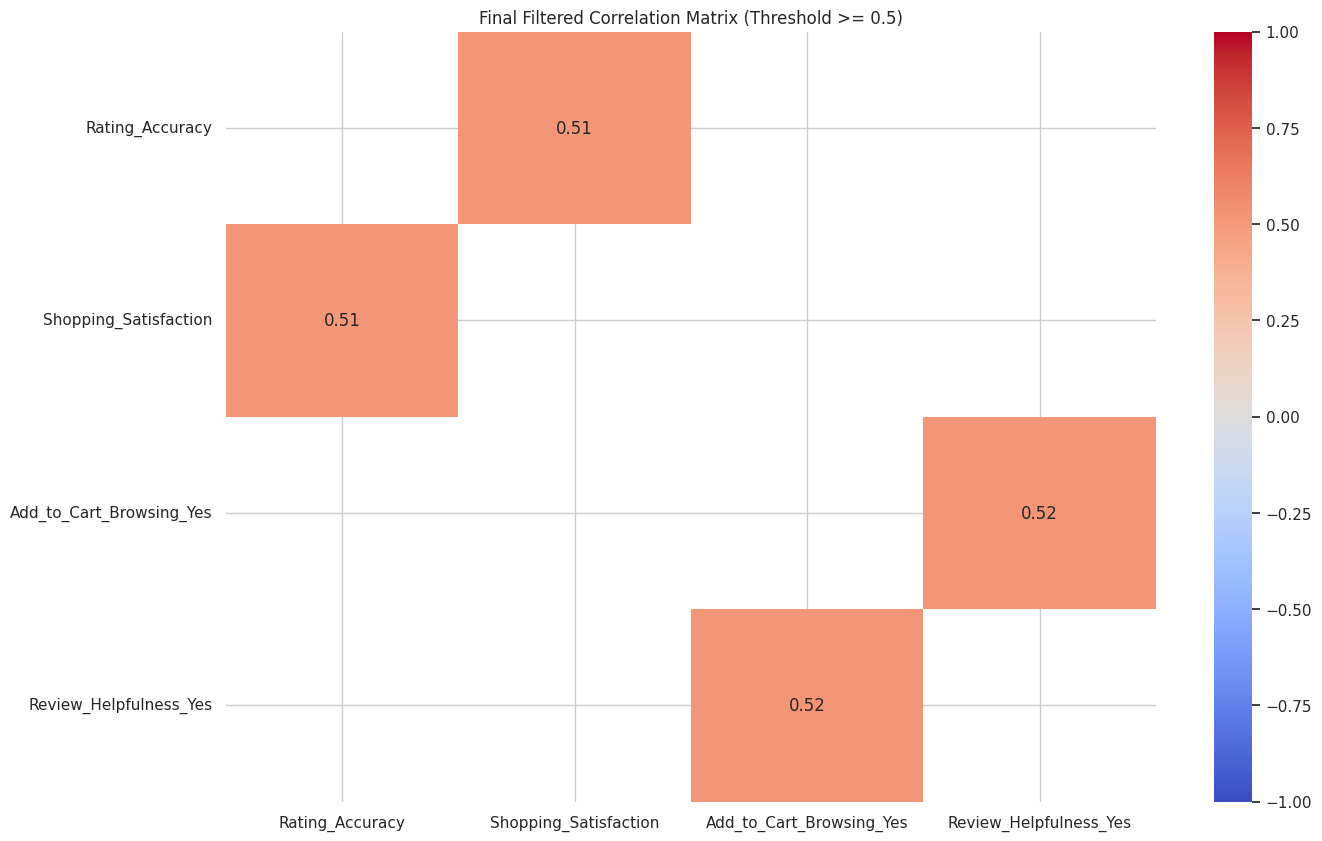

In [76]:
# New Correlation Matrix
correlation_matrix_2 = df_4.corr()

mask_2 = np.abs(correlation_matrix_2) >= threshold
filtered_corr_matrix_2 = correlation_matrix_2[mask_2]

np.fill_diagonal(filtered_corr_matrix_2.values, np.nan)
filtered_corr_matrix_2 = filtered_corr_matrix_2.dropna(how='all').dropna(axis=1, how='all')

plt.figure(figsize=(15, 10))
sns.heatmap(filtered_corr_matrix_2, annot=True, cmap='coolwarm', vmin=-1, vmax=1, cbar=True)
plt.title('Final Filtered Correlation Matrix (Threshold >= 0.5)')
plt.show()

In [77]:
# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_4)

In [78]:
# Apply PCA to dimensionality reduction
pca = PCA()
pca.fit(scaled_data)

# Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Choose n_components such that 95% of the variance is retained
n_components_95 = np.argmax(cumulative_explained_variance >= 0.95) + 1

print(f"Number of components to retain 95% variance: {n_components_95}")

Number of components to retain 95% variance: 34


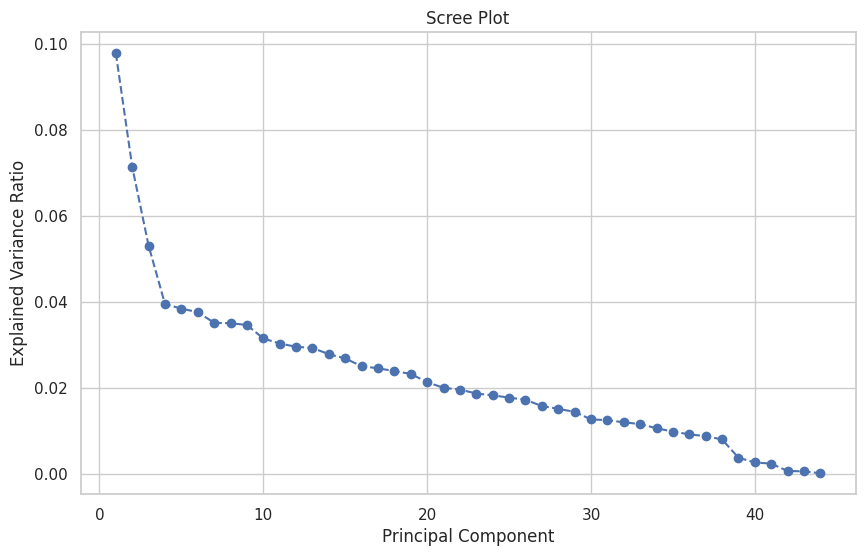

In [79]:
# Plot the explained variance ratio for each component
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

#### Comments

**Helps identify the most important components quickly by looking for the "elbow"**

There is a rapid decline in the explained variance ratio for the first few principal components, indicating that they **capture most of the variance**

After the initial decline, the curve flattens out, indicating that **additional components contribute less to the explained variance**

In this plot, it's a **bit challenging to identify a clear "elbow" point**, but there seems to be a gradual leveling off after approximately **10 components**

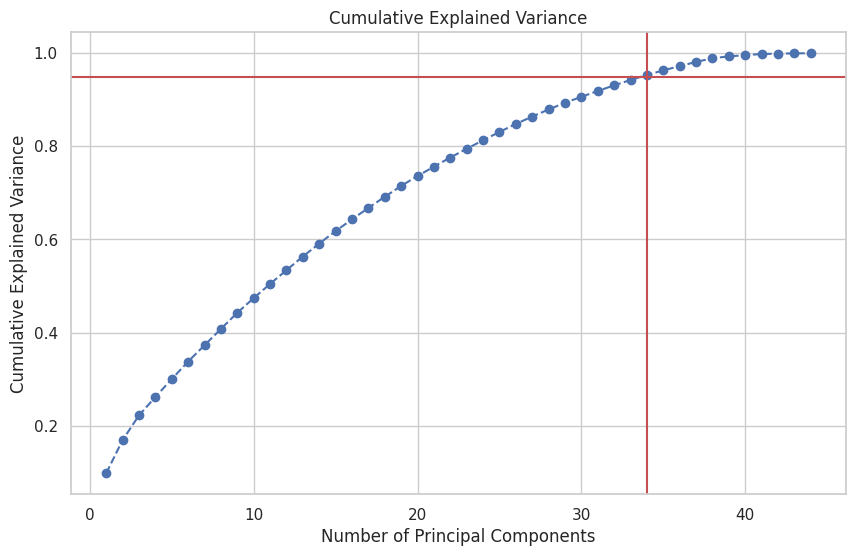

In [80]:
# Plot the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.axhline(y=0.95, color='r', linestyle='-')
plt.axvline(x=n_components_95, color='r', linestyle='-')
plt.show()

#### Comments

**Helps ensure to capturing enough variance by showing how many components are needed to reach the desired threshold**

The plot shows a **rapid increase** in explained variance with the addition of more principal components at the beginning

The **red lines intersects** the cumulative explained variance curve where it reaches the threshold, which is the point where approximately **95% of the variance is retained**

The number of principal components at which the red vertical line intersects the curve is the optimal n_components to retain 95% of the variance. It looks to be **around 30-34 components**

#### Final Decision

**For Maximum Variance Retention:** Choose n_components **around 34**

**For a Simpler Model:** I might opt for about **10 components**, but I'll need to accept that it retain less than 95% of the variance but I will have a more interpretable and simpler set of features...

My decision is: I want to prioritize the maximum variance retention, so I choose n_components = 34

In [81]:
# Based on the Cumulative Explained Variance manually choose the number of components where approximately 95% of the variance is retained
n_components = 34

# Apply PCA with n_components from the cumulative explained variance
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(scaled_data)

df_pca = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(n_components)])
df_pca.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  0.219895 -2.406267  2.977877 -1.036600  0.300295  1.419102  0.929798   
1  3.457095  0.294038  2.847760  0.157845 -1.541530  0.448145  0.950554   
2  0.206508  1.120507 -1.221323  2.338187 -1.233336  1.612644 -0.986837   
3  0.455468  0.936030  1.253995  1.045801 -0.704278  1.691073 -1.132143   
4  3.237757 -0.080595  0.659026  0.143940 -0.094723  1.885764 -0.020976   

        PC8       PC9      PC10  ...      PC25      PC26      PC27      PC28  \
0  0.681501  0.174086  0.043097  ... -0.664000 -0.131913 -0.480536 -0.757858   
1  0.876883 -0.287498 -0.721160  ... -2.327049 -0.650419  0.417676 -0.684733   
2  0.903854  0.316116  2.256153  ...  0.294135  0.292051 -0.114844 -0.965937   
3 -0.259655  0.290000  1.395847  ...  0.725484 -0.648122  0.520979 -0.044565   
4  0.763026  0.855178  0.686676  ...  0.029148 -0.915773  0.061399 -1.752463   

       PC29      PC30      PC31      PC32      PC33      PC34  
0  1.132907  0.264982 -1.232261  0.619292 -0.016882 -0.395530  
1 -0.260769 -0.787576 -0.319911 -0.756632 -0.341250  1.171219  
2 -0.180033  0.051945 -0.448355  0.788455 -0.009700  0.401037  
3  0.668499 -0.087978  1.804665 -1.031382  0.618157 -1.001604  
4 -1.123726 -0.719653  0.044798 -1.740592 -0.934847 -0.455057  

[5 rows x 34 columns]

### KMeans++

KMeans++ improves the initialization step by using a more strategic approach to place the initial centroids

Similar to KMeans, but starts with a better initialization of centroids

* **Key Characteristics:**

**Partitioning Method:** Divides the dataset into K distinct, non-overlapping clusters

**Centroid-Based:** Clusters are defined by their centroids (mean of points in the cluster)

* **Pros:**

**Simplicity:** Easy to understand and implement

**Scalability:** Efficient for large datasets

**Speed:** Generally fast for small to medium-sized datasets

* **Cons:**

**Sensitivity to Initialization:** Results can vary based on the initial placement of centroids

**Fixed Number of Clusters:** Requires specifying the number of clusters (K) in advance

**Outlier Sensitivity:** Can be heavily affected by outliers, as they can distort centroids

In [82]:
# Function to find the best K
def find_best_k(data, max_k=10):
    inertia = []
    silhouette_scores = []
    K_range = range(2, max_k + 1)

    for k in K_range:
        kmeans = KMeans(n_clusters=k, random_state=42, init='k-means++')
        kmeans.fit(data)
        inertia.append(kmeans.inertia_)
        score = silhouette_score(data, kmeans.labels_)
        silhouette_scores.append(score)

    # Elbow method plot
    plt.figure(figsize=(12, 6))
    plt.plot(K_range, inertia, 'bo-', label='Inertia')
    plt.xlabel('Number of Clusters, K')
    plt.ylabel('Inertia')
    plt.title('Elbow Method For Optimal K')
    plt.legend()
    plt.show()

    # Silhouette score plot
    plt.figure(figsize=(12, 6))
    plt.plot(K_range, silhouette_scores, 'bo-', label='Silhouette Score')
    plt.xlabel('Number of Clusters, K')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score For Optimal K')
    plt.legend()
    plt.show()

    # Find the best K
    best_k = K_range[silhouette_scores.index(max(silhouette_scores))]
    print(f"Best K according to Silhouette Score: {best_k}")

    return best_k

Finding best K for df_pca...


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

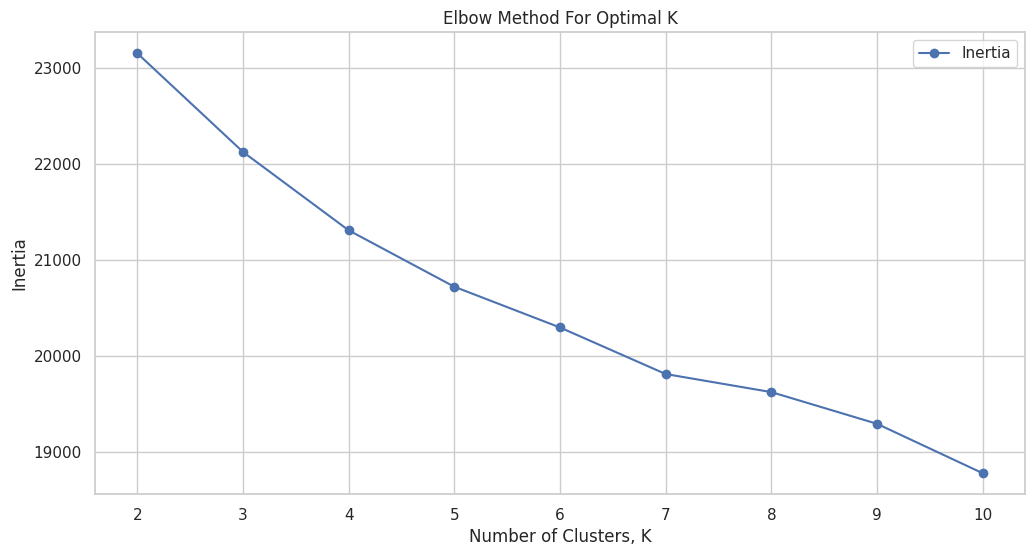

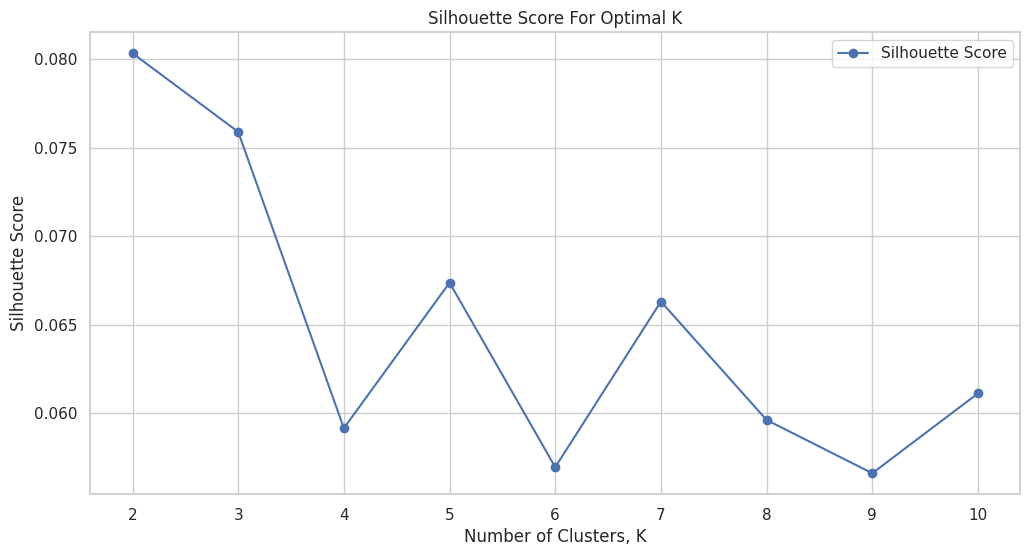

Best K according to Silhouette Score: 2


In [83]:
# Find the best K for df
print("Finding best K for df_pca...")
best_k = find_best_k(df_pca)

#### Comments

**Inertia** is a metric used to evaluate the quality of a clustering solution. It **measures the compactness of the clusters**, quantifying **how far the points within a cluster are from the centroid of that cluster**. The inertia for a particular cluster is the sum of the squared distances between each data point in the cluster and the centroid of the cluster. The objective of the K-means algorithm is to minimize the overall inertia, meaning that the data points within each cluster should be as close as possible to their cluster's centroid.

**Lower inertia** values indicate that the data points are closer to the centroids of their respective clusters, implying a better, **more compact clustering**.


**Silhouette** score is a metric used to evaluate the quality of clusters in unsupervised learning, including clustering algorithms like K-means. It provides a **measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation)**. The silhouette score ranges from -1 to 1, where** a high silhouette score indicates that the object is well matched to its own cluster** and poorly matched to neighboring clusters.

#### Clustering with best K

In [84]:
df_pca1 = df_pca.copy()

In [85]:
# Fit KMeans++ with the best K
kmeans = KMeans(n_clusters=best_k, random_state=42, init='k-means++')
clusters = kmeans.fit_predict(df_pca1)

# Add cluster labels to the DataFrame
df_pca1['Cluster'] = clusters

print("\nClustering results for best k:")
print(df_pca1['Cluster'].value_counts())


Clustering results for best k:
Cluster
0    354
1    244
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


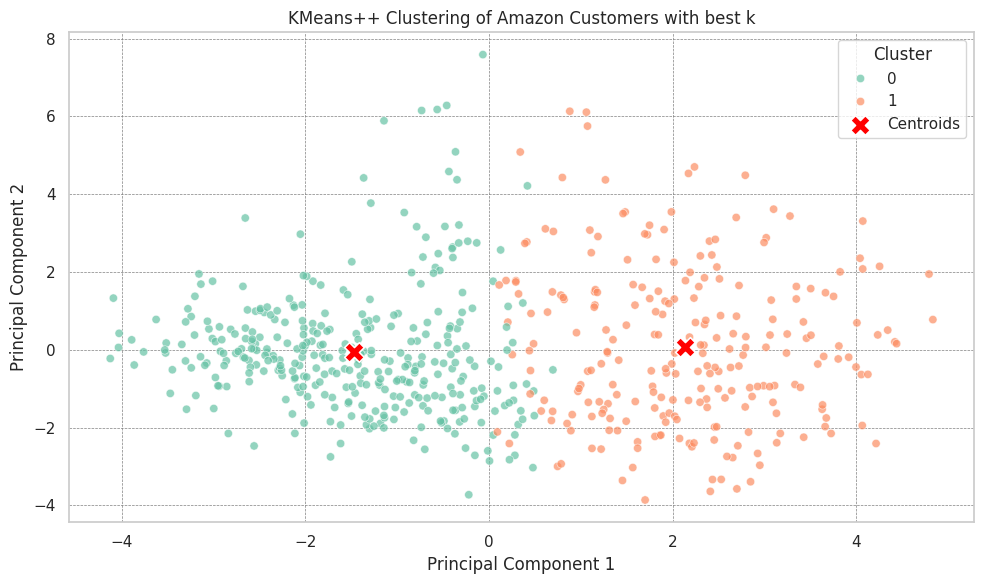

In [86]:
# Apply PCA to reduce to 2 components for visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(df_pca1.drop(columns=['Cluster']))

# Create a DataFrame for the 2D PCA data
df_pca_2d = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2'])
df_pca_2d['Cluster'] = df_pca1['Cluster']

# Transform the centroids to 2D using the same PCA model
centroids_2d = pca.transform(kmeans.cluster_centers_)

# Plotting the clusters and centroids
cluster_palette = sns.color_palette("Set2", n_colors=len(df_pca_2d['Cluster'].unique()))

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca_2d, x='PC1', y='PC2', hue='Cluster', palette=cluster_palette, alpha=0.7)

plt.title("KMeans++ Clustering of Amazon Customers with best k")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

plt.grid(True)
plt.tight_layout()

plt.legend(title="Cluster", bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(color='gray', linestyle='--', linewidth=0.5)

sns.scatterplot(x=centroids_2d[:, 0], y=centroids_2d[:, 1], marker='X', s=200, color='red', label='Centroids')
plt.legend(title='Cluster')
plt.show()

#### Comments

We can see that, for K=3, some instances of each cluster is inside the boundary of other cluster (means that the **clusters boundary is overlapping**)

#### Clustering with k=2

In [87]:
df_pca2 = df_pca.copy()

In [88]:
# Fit KMeans++ with k = 2
kmeans2 = KMeans(n_clusters=2, random_state=42, init='k-means++')
clusters2 = kmeans2.fit_predict(df_pca2)

# Add cluster labels to the DataFrame
df_pca2['Cluster'] = clusters2

print("\nClustering results for k=2:")
print(df_pca2['Cluster'].value_counts())


Clustering results for k=2:
Cluster
0    354
1    244
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


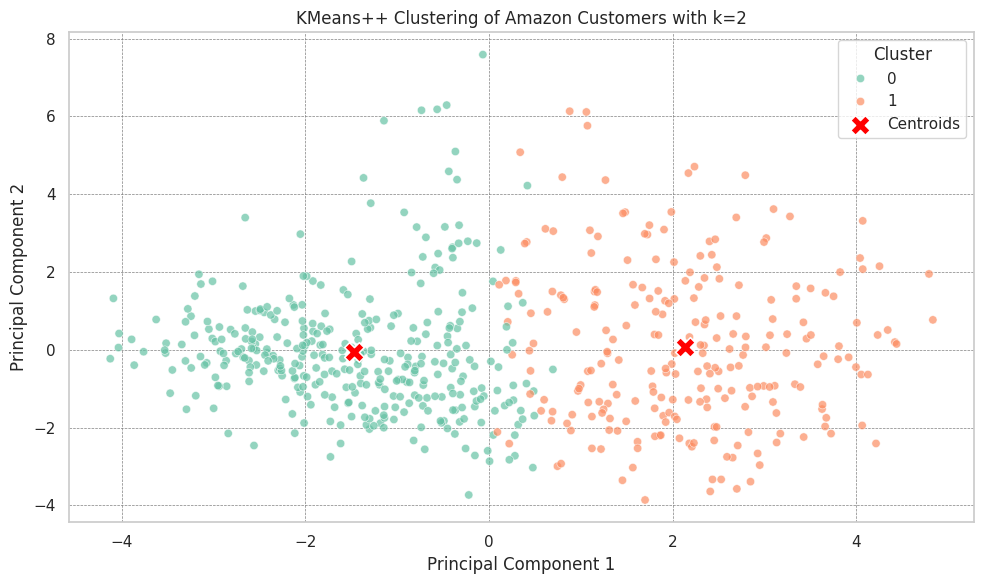

In [89]:
# Apply PCA to reduce to 2 components for visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(df_pca2.drop(columns=['Cluster']))

# Create a DataFrame for the 2D PCA data
df_pca_2d = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2'])
df_pca_2d['Cluster'] = df_pca2['Cluster']

# Transform the centroids to 2D using the same PCA model
centroids_2d = pca.transform(kmeans2.cluster_centers_)

# Plotting the clusters and centroids
cluster_palette = sns.color_palette("Set2", n_colors=len(df_pca_2d['Cluster'].unique()))

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca_2d, x='PC1', y='PC2', hue='Cluster', palette=cluster_palette, alpha=0.7)

plt.title("KMeans++ Clustering of Amazon Customers with k=2")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

plt.grid(True)
plt.tight_layout()

plt.legend(title="Cluster", bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(color='gray', linestyle='--', linewidth=0.5)

sns.scatterplot(x=centroids_2d[:, 0], y=centroids_2d[:, 1], marker='X', s=200, color='red', label='Centroids')
plt.legend(title='Cluster')
plt.show()

#### Comments

And for k=2 some instaces still overlapping the boundaries but less than k=3

### Personas

In [90]:
# Drop row 442 with age = 3 and 578 with age = 12
df = df.drop(index=[442,578])

# Add Columns with the clusters
df['Cluster'] = clusters2

# Rename some columns
df = df.rename(columns={"Personalized_Recommendation_Frequency": "Personalized_Recommendation_Usage", "Personalized_Recommendation_Frequency ": "Personalized_Recommendation_Frequency", "Rating_Accuracy ": "Rating_Accuracy"})

In [91]:
# Split df into numerical and categorical features
numerical_features = ['age', 'Customer_Reviews_Importance', 'Personalized_Recommendation_Frequency', 'Rating_Accuracy', 'Shopping_Satisfaction']
categorical_features = df.select_dtypes(include=['object'])

In [92]:
# Mean
numerical_mean = df.groupby('Cluster')[numerical_features].mean()
print("Numerical Features Mean:")
numerical_mean

Numerical Features Mean:


age  Customer_Reviews_Importance  \
Cluster                                           
0        32.564972                     2.889831   
1        28.381148                     1.885246   

         Personalized_Recommendation_Frequency  Rating_Accuracy  \
Cluster                                                           
0                                     2.841808         2.833333   
1                                     2.491803         2.430328   

         Shopping_Satisfaction  
Cluster                         
0                     2.709040  
1                     2.102459

In [93]:
# Median
numerical_median = df.groupby('Cluster')[numerical_features].median()
print("Numerical Features Median:")
numerical_median

Numerical Features Median:


age  Customer_Reviews_Importance  \
Cluster                                      
0        32.0                          3.0   
1        25.0                          1.0   

         Personalized_Recommendation_Frequency  Rating_Accuracy  \
Cluster                                                           
0                                          3.0              3.0   
1                                          2.0              2.0   

         Shopping_Satisfaction  
Cluster                         
0                          3.0  
1                          2.0

In [94]:
numerical_summary = df.groupby('Cluster')[numerical_features].mean()

In [95]:
# Categorical value counts with a more readable format and fills any missing values with zero
categorical_summary = {}

for feature in categorical_features:
    summary = df.groupby('Cluster')[feature].value_counts(normalize=True).unstack().fillna(0)
    categorical_summary[feature] = summary

In [96]:
# Creating personas
personas = []

for cluster_id in numerical_summary.index:
    persona = {
        'Cluster': cluster_id,
        'Description': f'Persona for Cluster {cluster_id}',
        'Numerical_Features': numerical_summary.loc[cluster_id].to_dict(),
        'Categorical_Features': {feature: categorical_summary[feature].loc[cluster_id].idxmax() for feature in categorical_features}
    }
    personas.append(persona)

# Display personas
for persona in personas:
    print(f"\n{persona['Description']}:")
    for char, value in persona['Numerical_Features'].items():
        print(f"  {char}: {value:.2f}")
    for char, value in persona['Categorical_Features'].items():
        print(f"  {char}: {value}")



Persona for Cluster 0:
  age: 32.56
  Customer_Reviews_Importance: 2.89
  Personalized_Recommendation_Frequency: 2.84
  Rating_Accuracy: 2.83
  Shopping_Satisfaction: 2.71
  Gender: Female
  Purchase_Frequency: Few times a month
  Purchase_Categories: Beauty and Personal Care
  Personalized_Recommendation_Usage: Sometimes
  Browsing_Frequency: Few times a week
  Product_Search_Method: categories
  Search_Result_Exploration: Multiple pages
  Add_to_Cart_Browsing: Maybe
  Cart_Completion_Frequency: Sometimes
  Cart_Abandonment_Factors: Changed my mind or no longer need the item
  Saveforlater_Frequency: Sometimes
  Review_Left: Yes
  Review_Reliability: Occasionally
  Review_Helpfulness: Sometimes
  Recommendation_Helpfulness: Sometimes
  Service_Appreciation: Product recommendations
  Improvement_Areas: Customer service responsiveness

Persona for Cluster 1:
  age: 28.38
  Customer_Reviews_Importance: 1.89
  Personalized_Recommendation_Frequency: 2.49
  Rating_Accuracy: 2.43
  Shopping

#### Persona for Cluster 0:

**Description:** Cluster 0 consists primarily of **female** customers around the age of **32**. These customers are **moderately engaged** with Amazon, typically **making purchases a few times a month**, with a particular **interest in Beauty and Personal Care products**.

They **browse Amazon's website a few times a week** and often use **category-based searches to find products**. When exploring search results, they **tend to look through multiple pages** rather than focusing solely on the first page.

**Customer reviews** play a moderate role in their **decision-making process**, with a **moderate level of importance**. They **sometimes add products to their cart during browsing** and **occasionally complete the purchase**. When they **abandon** their cart, it's **often because they changed their mind or no longer need the item**.

These customers **use Amazon's "Save for Later" feature occasionally**. They **have left product reviews in the past and rely on reviews occasionally when making purchase decisions**. They **find other customers' reviews sometimes helpful** and believe the **accuracy and relevance** of **personalized recommendations** to be **moderate**.

Their **overall shopping satisfaction is moderate**, and they **appreciate product recommendations the most**. However, they believe that **Amazon could improve** in areas like **customer service responsiveness**.

#### Persona for Cluster 1:

**Description:** Cluster 1 consists primarily of **female** customers around the age of **25**. These customers are **less engaged with Amazon**, typically **making purchases less than once a month** and buying products from **various categories**.

They **browse Amazon's website a few times a week** and prefer to use **keyword searches to find products**. **Similar to Cluster 0, they also explore multiple pages of search results**.

**Customer reviews** are **less important** to them when making **purchasing decisions**. They **frequently add products to their cart** and **sometimes complete the purchase**. When they **abandon** their cart, it's usually because they **found a better price elsewhere**.

These customers **use Amazon's "Save for Later" feature often**. They **have left product reviews in the past and heavily rely on reviews when making purchase decisions**. They **find other customers' reviews very helpful** and believe the **relevance and accuracy** of **personalized recommendations** to be **below average**.

Their **overall shopping satisfaction is below average**, and they **appreciate wide product selection the most**. However, they believe that **Amazon could improve** in areas like **product quality and accuracy**.

### Next Steps

* Better feature engineering
* Outlier detection with pyOD
* DBSCAN with better parameters
* Another Algorithm like Clustering Hierarquical
* Use LLM for clustering
* Use LGBMClassifier to address the personas

### DBSCAN

###### Density-Based Spatial Clustering of Applications with Noise

* **Key Characteristics:**

**Density-Based:** Forms clusters based on the density of data points in the feature space

**Nonparametric:** Does not require specifying the number of clusters in advance

**Noise Handling:** Identifies and excludes noise points that do not belong to any cluster

* **Pros:**

**No Need for K:** Automatically determines the number of cluster

**Noise Robustness:** Can identify and handle noise and outliers


* **Cons:**

**Parameter Sensitivity:** Requires careful tuning of (\epsilon) (radius) and MinPts (minimum points) parameters

**Density Variations:** Struggles with datasets having clusters of varying densities

**Scalability:** Less efficient for very large datasets compared to KMeans

### Clustering Hierarchical

* **Key Characteristics:**

**Hierarchical:** Builds a tree-like structure (dendrogram) representing nested clusters

**Agglomerative:** Most common approach, starting with individual points and merging them into clusters

**Divisive:** Alternative approach, starting with one large cluster and recursively splitting it

* **Pros:**

**Dendrogram Visualization:** Provides a visual representation of the clustering process and relationships between clusters

**No Need for K:** Can decide the number of clusters by cutting the dendrogram at the desired level

**Versatility:** Works well with different types of distance metrics


* **Cons:**

**Scalability:** Computationally intensive, especially for large datasets

**Distance Metric Sensitivity:** Results can vary significantly with different distance metrics and linkage methods

**Fixed Hierarchies:** Once a merge or split is made, it cannot be undone, leading to potential suboptimal clustering

<h1><b>LR model

In [97]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


In [98]:
# Fill missing values for 'Product_Search_Method' with the mode
df['Product_Search_Method'].fillna(df['Product_Search_Method'].mode()[0], inplace=True)

# Convert categorical variables to numeric using Label Encoding
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le


In [99]:
# Define features and target variable
X = df.drop(['Shopping_Satisfaction'], axis=1)
y = df['Shopping_Satisfaction']


In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [101]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [102]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [103]:
y_pred = model.predict(X_test)


In [104]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

cr = classification_report(y_test, y_pred)
print("Classification Report:\n", cr)


Confusion Matrix:
 [[17 11  8  0  0]
 [10 27 11  2  0]
 [ 1 21 35  5  1]
 [ 0  5 13  7  0]
 [ 0  0  2  3  1]]
Classification Report:
               precision    recall  f1-score   support

           1       0.61      0.47      0.53        36
           2       0.42      0.54      0.47        50
           3       0.51      0.56      0.53        63
           4       0.41      0.28      0.33        25
           5       0.50      0.17      0.25         6

    accuracy                           0.48       180
   macro avg       0.49      0.40      0.42       180
weighted avg       0.49      0.48      0.48       180



In [107]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score, roc_curve

# Binarize the output for multiclass classification
y_test_bin = label_binarize(y_test, classes=np.unique(y))
y_prob_bin = model.predict_proba(X_test)

# Compute AUC for each class
auc_scores = {}
for i in range(y_test_bin.shape[1]):
    auc_scores[i] = roc_auc_score(y_test_bin[:, i], y_prob_bin[:, i])
    print(f"Class {i} AUC Score: {auc_scores[i]}")


Class 0 AUC Score: 0.7795138888888888
Class 1 AUC Score: 0.6535384615384615
Class 2 AUC Score: 0.6779270112603445
Class 3 AUC Score: 0.7478709677419355
Class 4 AUC Score: 0.8409961685823755


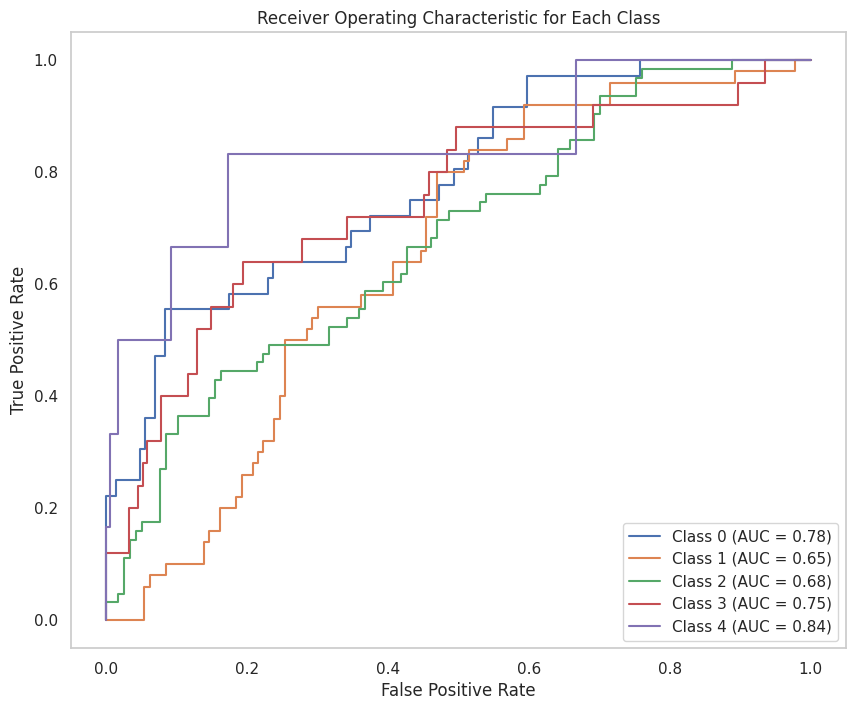

In [108]:
plt.figure(figsize=(10, 8))

for i in range(y_test_bin.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob_bin[:, i])
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {auc_scores[i]:.2f})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Each Class')
plt.legend(loc='best')
plt.grid()
plt.show()
